# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [4]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

#select model and sklearn imports 
import statsmodels.api as sm
from sklearn.metrics import roc_curve,recall_score,roc_auc_score,precision_score,accuracy_score,confusion_matrix,f1_score,precision_recall_curve
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [5]:
data = pd.read_csv("INNHotelsGroup (1).csv")
df= data.copy()

## Data Overview

- Observations
- Sanity checks

***The initial steps to get an overview of any dataset is to:***

- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [6]:
df.head().T

0             1            2  \
Booking_ID                                INN00001      INN00002     INN00003   
no_of_adults                                     2             2            1   
no_of_children                                   0             0            0   
no_of_weekend_nights                             1             2            2   
no_of_week_nights                                2             3            1   
type_of_meal_plan                      Meal Plan 1  Not Selected  Meal Plan 1   
required_car_parking_space                       0             0            0   
room_type_reserved                     Room_Type 1   Room_Type 1  Room_Type 1   
lead_time                                      224             5            1   
arrival_year                                  2017          2018         2018   
arrival_month                                   10            11            2   
arrival_date                                     2             6           28   
market_segment_type                        Offline        Online       Online   
repeated_guest                                   0             0            0   
no_of_previous_cancellations                     0             0            0   
no_of_previous_bookings_not_canceled             0             0            0   
avg_price_per_room                            65.0        106.68         60.0   
no_of_special_requests                           0             1            0   
booking_status                        Not_Canceled  Not_Canceled     Canceled   

                                                3             4  
Booking_ID                               INN00004      INN00005  
no_of_adults                                    2             2  
no_of_children                                  0             0  
no_of_weekend_nights                            0             1  
no_of_week_nights                               2             1  
type_of_meal_plan                     Meal Plan 1  Not Selected  
required_car_parking_space                      0             0  
room_type_reserved                    Room_Type 1   Room_Type 1  
lead_time                                     211            48  
arrival_year                                 2018          2018  
arrival_month                                   5             4  
arrival_date                                   20            11  
market_segment_type                        Online        Online  
repeated_guest                                  0             0  
no_of_previous_cancellations                    0             0  
no_of_previous_bookings_not_canceled            0             0  
avg_price_per_room                          100.0          94.5  
no_of_special_requests                          0             0  
booking_status                           Canceled      Canceled

***Checking the Shape of the data***

In [7]:
df.shape

(36275, 19)

***Observation***
- The data has 19 columns and 36275 rows 

### Checking the data types of the columns for the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

***Observation***
- There are 13 int, 5 objects, 1 float in the data set 
- There is no null in the data set 
- the target varaible is in object 

### Statistical summary of the dataset

In [9]:
data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

***Observation***
- `no_of_adults`: Is normally distrubuted. 
- `no_of_children`: The range various from 0 to 10. Which is slightly obnormal 
- `no_of_weekend_nights`,`no_of_week_nights`,`lead_time`,`no_of_previous_cancellations`,`no_of_previous_bookings_not_canceled`,`avg_price_per_room`,`no_of_special_requests`: It looks like the data highly skewed to-words left.


## Getting the categorical summary 

In [10]:
col=data.select_dtypes(include=np.object_).columns.tolist()
for i,var in enumerate (col):
    print(df[var].value_counts())
    print("***"*15)

Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64
*********************************************
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
*********************************************
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
*********************************************
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
*********************************************
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
****************************************

### Checking the null and duplicate 

In [11]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

***Observation***
- The data has no null values 

In [12]:
df.duplicated().sum()

0

***Observation***
- There is no duplicates in the data  

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram   

In [14]:

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

### Histplot and the Boxplot for the adult visiting

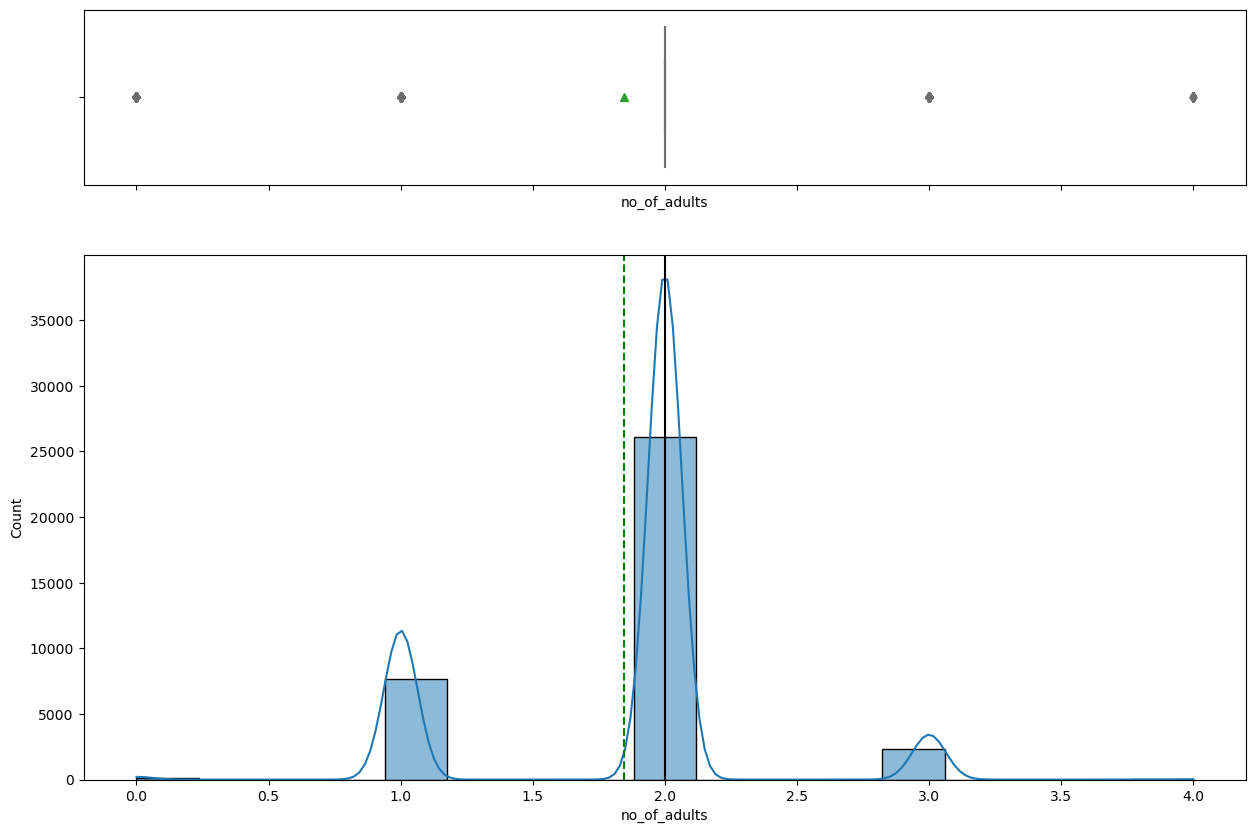

In [16]:
histogram_boxplot(df,"no_of_adults",kde=True)

***Observation***
- The Avg number of the abult are 2. Nearly 25k Visited
- They are couple of the outliers on the both sides of the whiskers 
- Max 4 adult visited 

### Histplot_boxplot for the number of the childern 

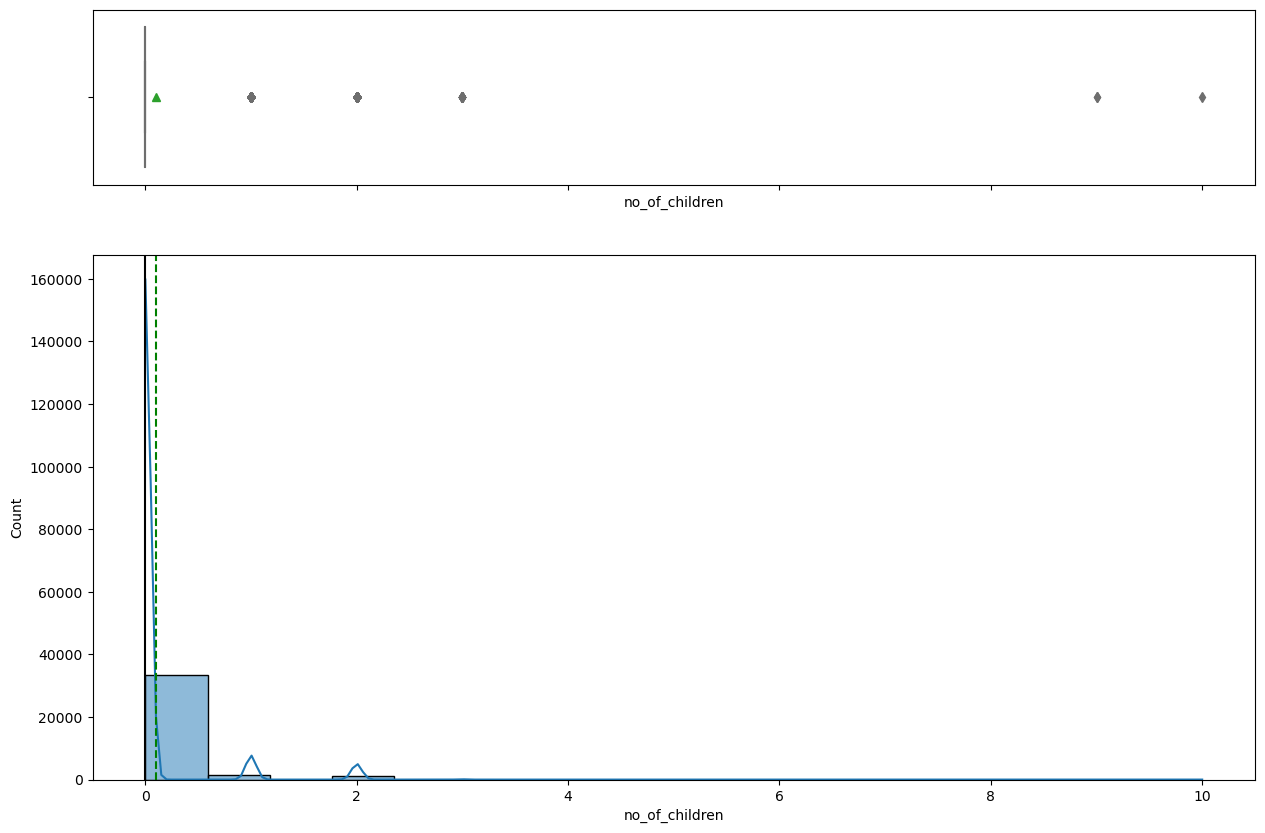

In [17]:
histogram_boxplot(df,"no_of_children",kde=True)

***Observation***
- The median is zero, The max is 10 need to check the data  

### The histplot and the boxplot for no_of_weekend_nights

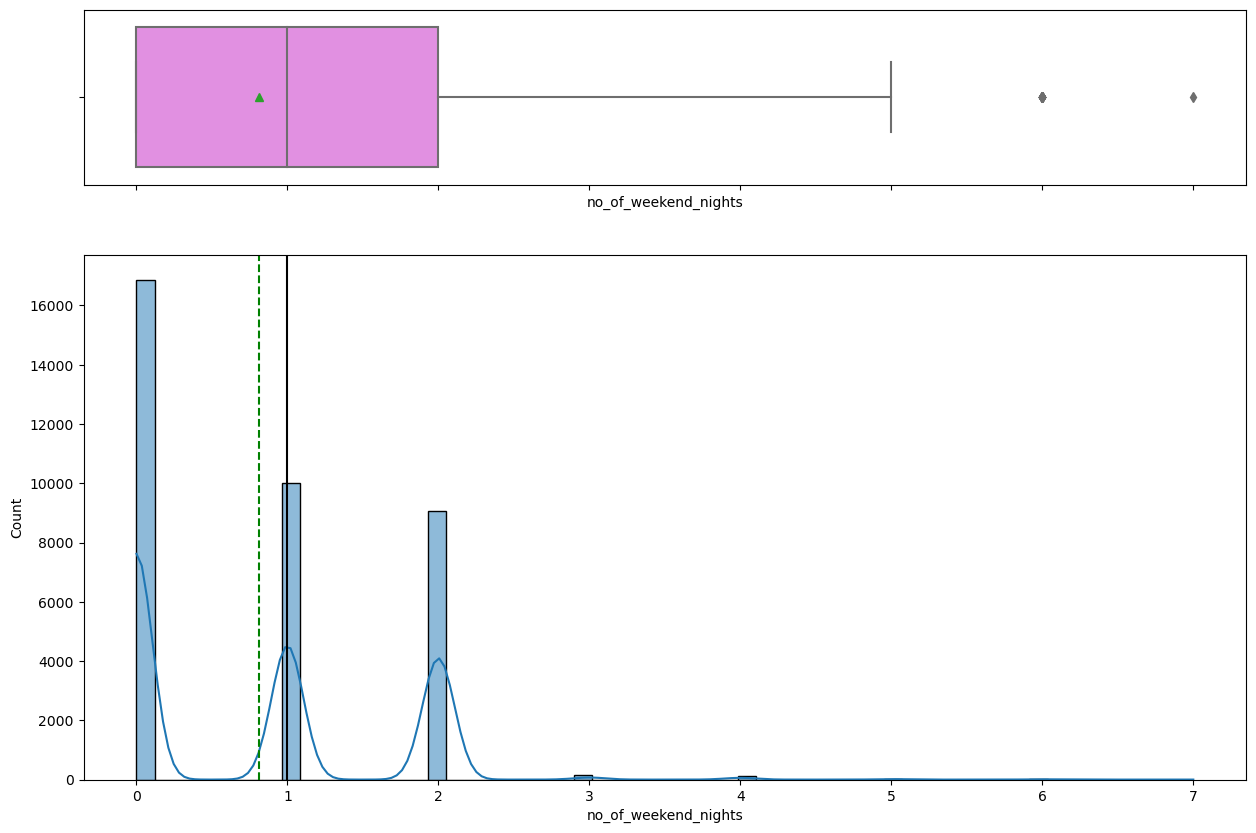

In [18]:
histogram_boxplot(df,"no_of_weekend_nights",kde=True)

***Observation***
- The max number of the people stayed are 0 night 
- The data showes the there are some people who booked on the weekends stayed for 7 day 
- THe max number of the tayed for the 1 and 2 days which is around 20k

### The histplot plot and boxplot for the no_of_week_nights

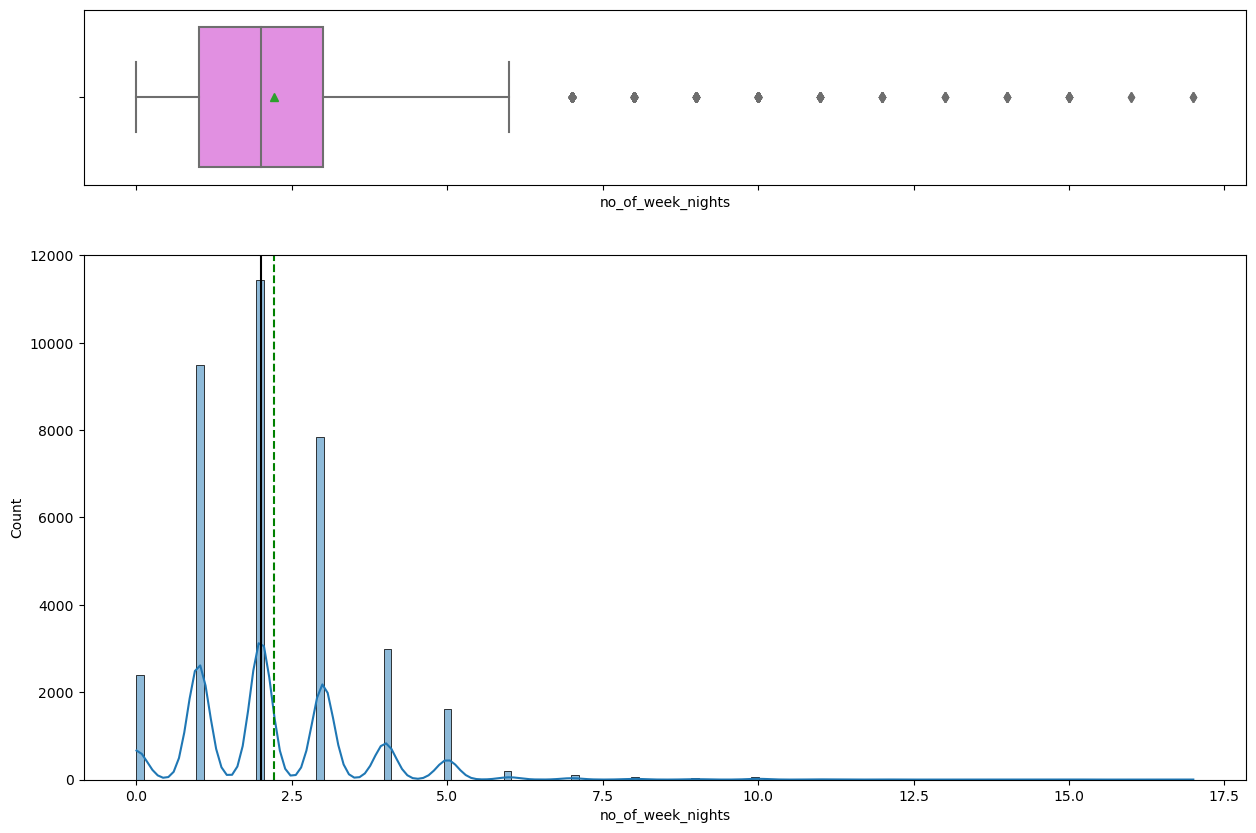

In [19]:
histogram_boxplot(df,"no_of_week_nights",kde=True)

***Observation***
- The no_of_week_nights the people stayed max 17 days 
- The median for no_of_week_nights is 2 days 
- The people stayed for 2 days and 3 days are more than the median

### Hist and Box plot for required_car_parking_space

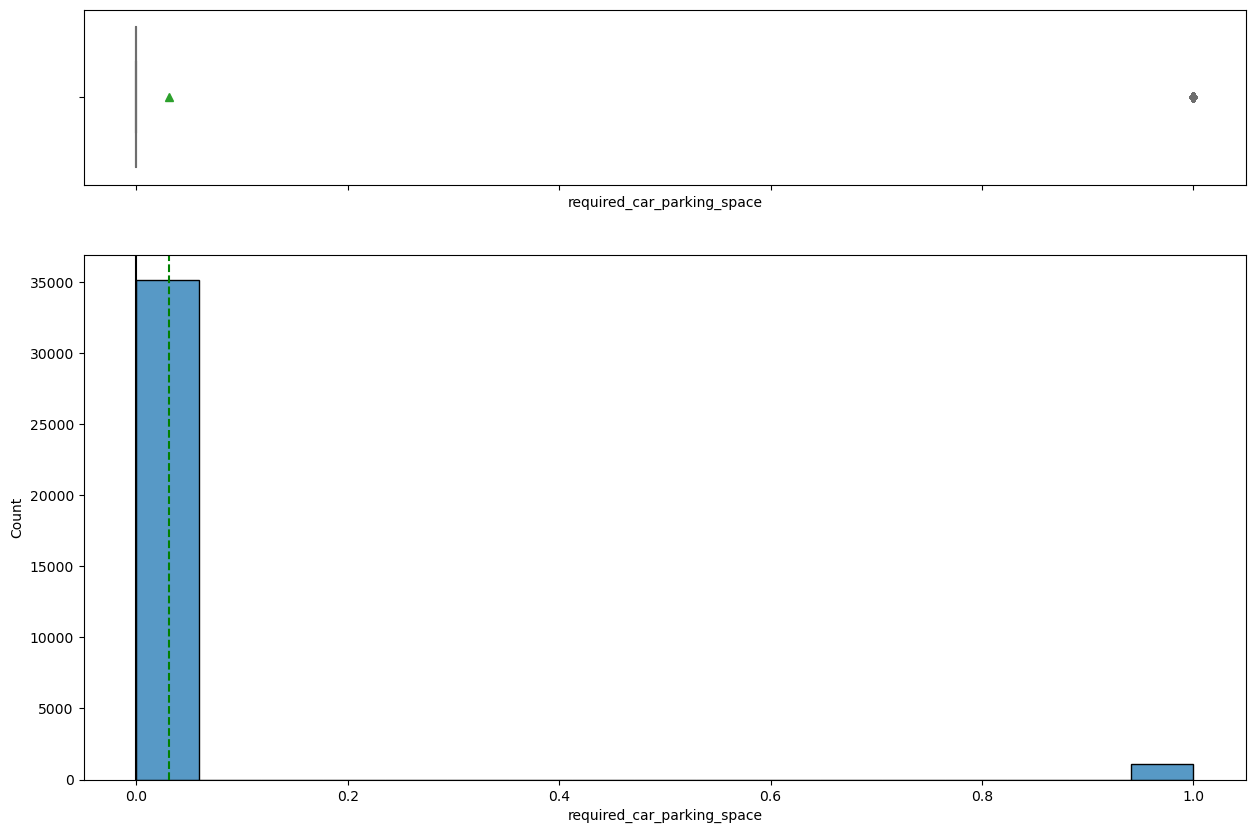

In [20]:
histogram_boxplot(df,"required_car_parking_space")

***Observation***
- They are less people required_car_parking_space comparing the total number of the people

### Hist and box plot for lead_time

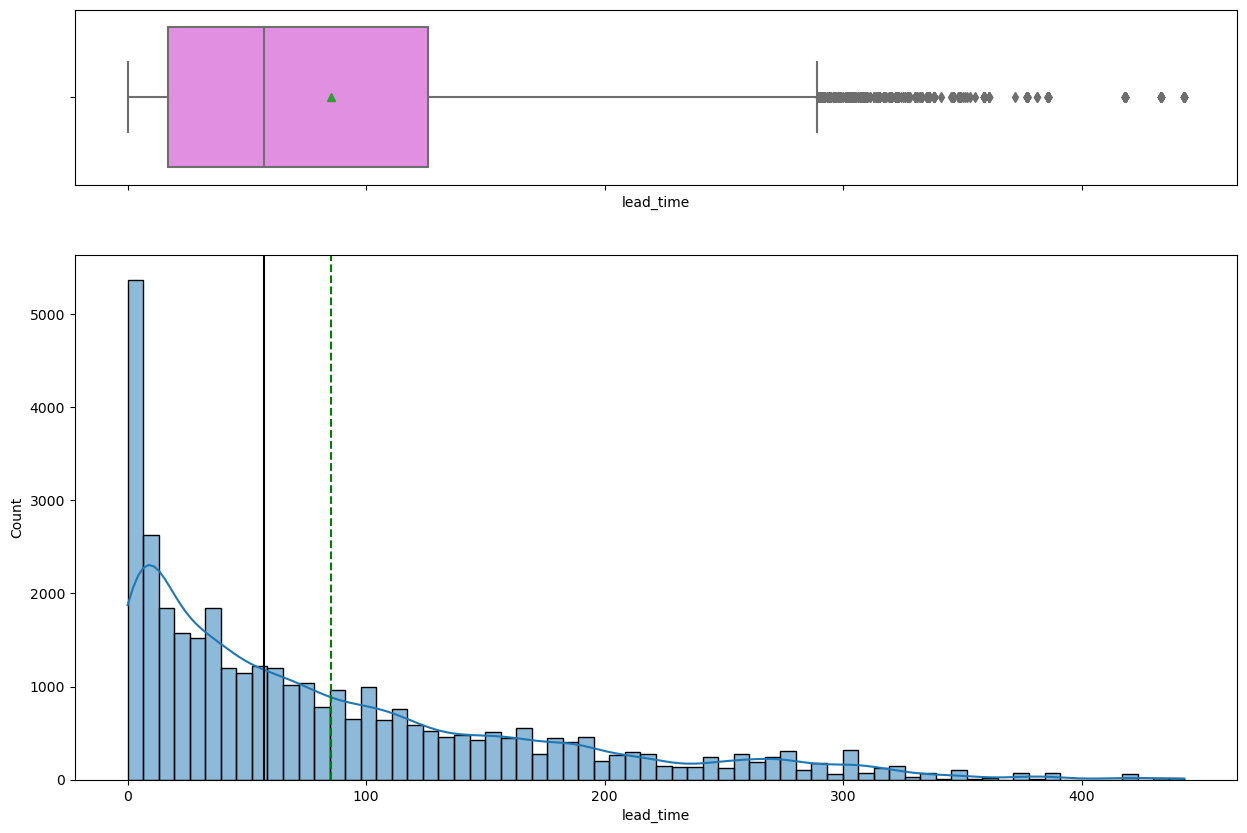

In [21]:
histogram_boxplot(df,"lead_time",kde=True)

***Observation***
-  Number of days between the date of booking and the arrival date is hihest at 0 days 
- The mean range mean range around 90days and the median is around 50days
- The max shows 443 days advance 

### Hist and box plot arrival_year

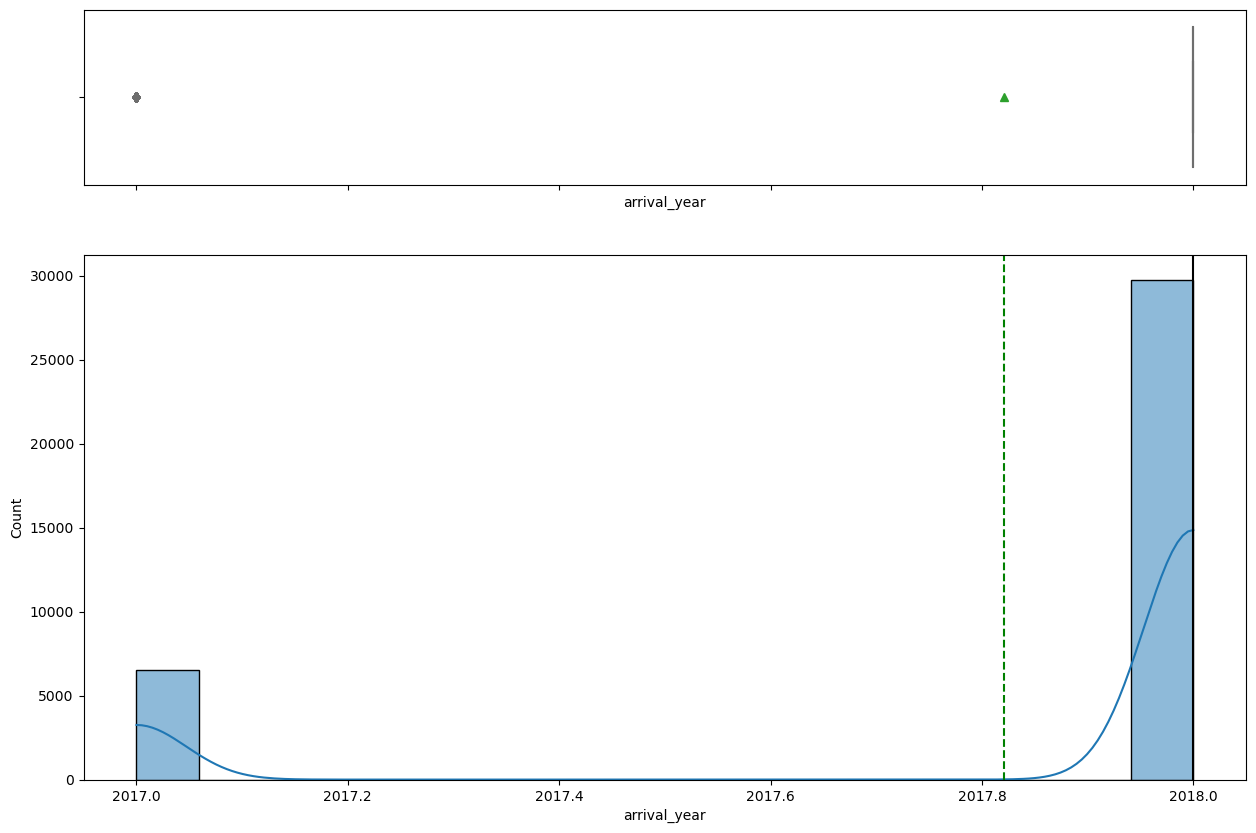

In [22]:
histogram_boxplot(df,"arrival_year",kde=True)

***Observation***
- The max Year of arrival date is 2018

### Hist and boxplot arrival_month

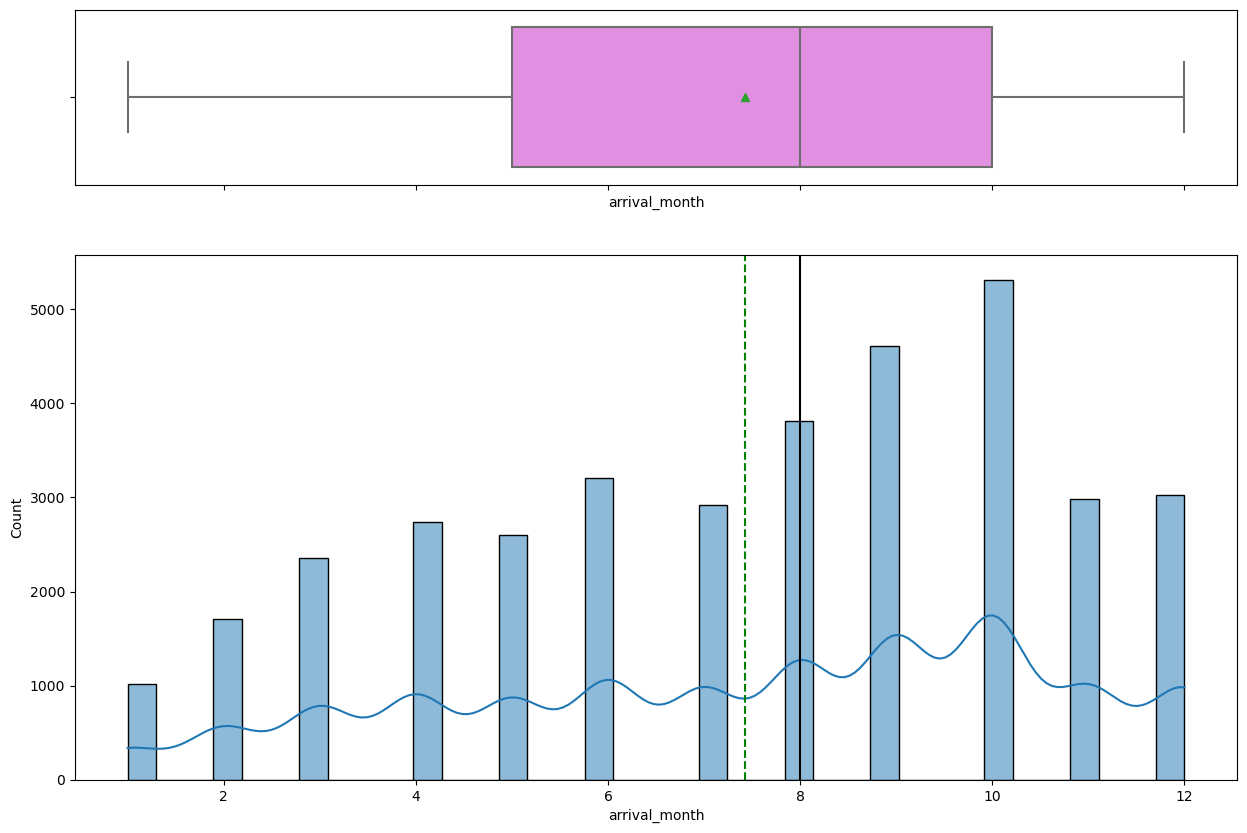

In [23]:
histogram_boxplot(df,"arrival_month",kde=True)

***Observation***
- The max shows octobar but need to check with the year of classification 


### Hist and box plot for repeated_guest

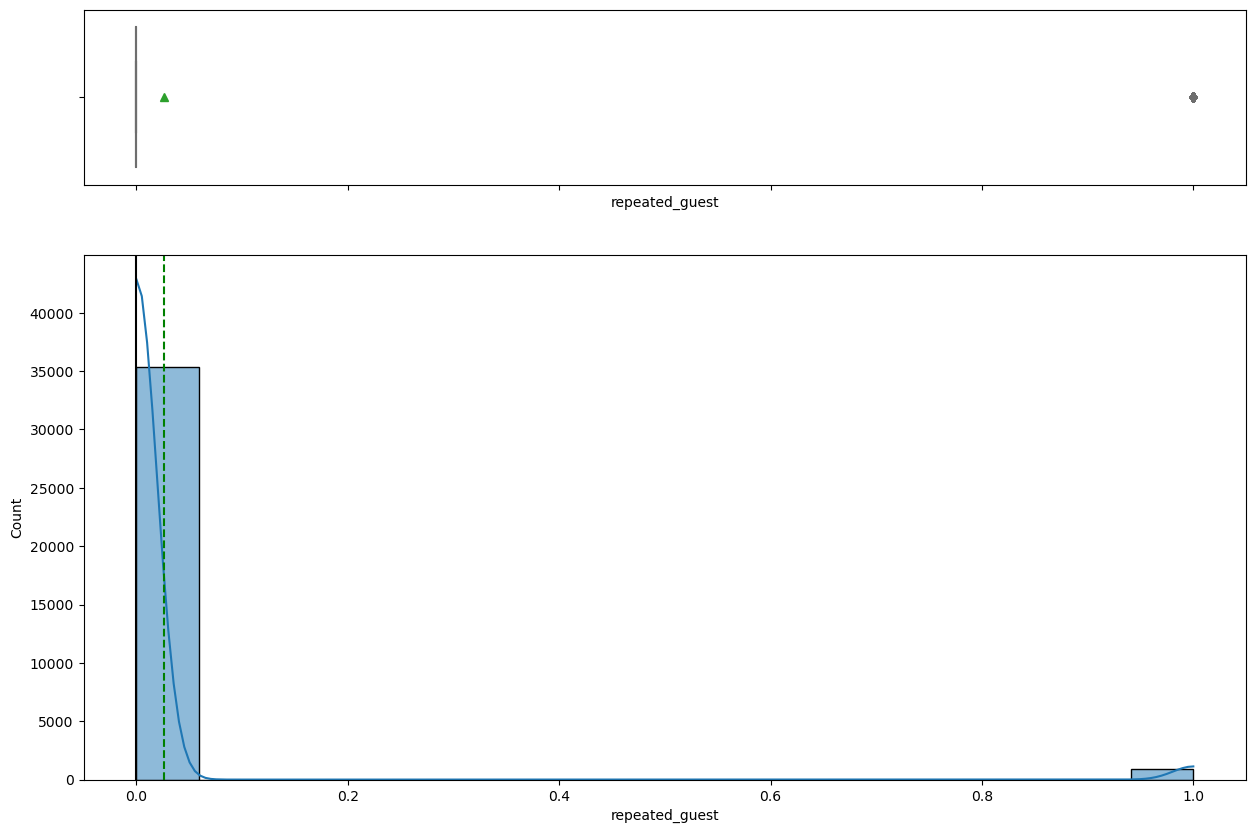

In [24]:
histogram_boxplot(df,"repeated_guest",kde=True)

***Observation***
- The data shows repeated_guest are vey less 

### Hist and Box plot for no_of_previous_cancellations

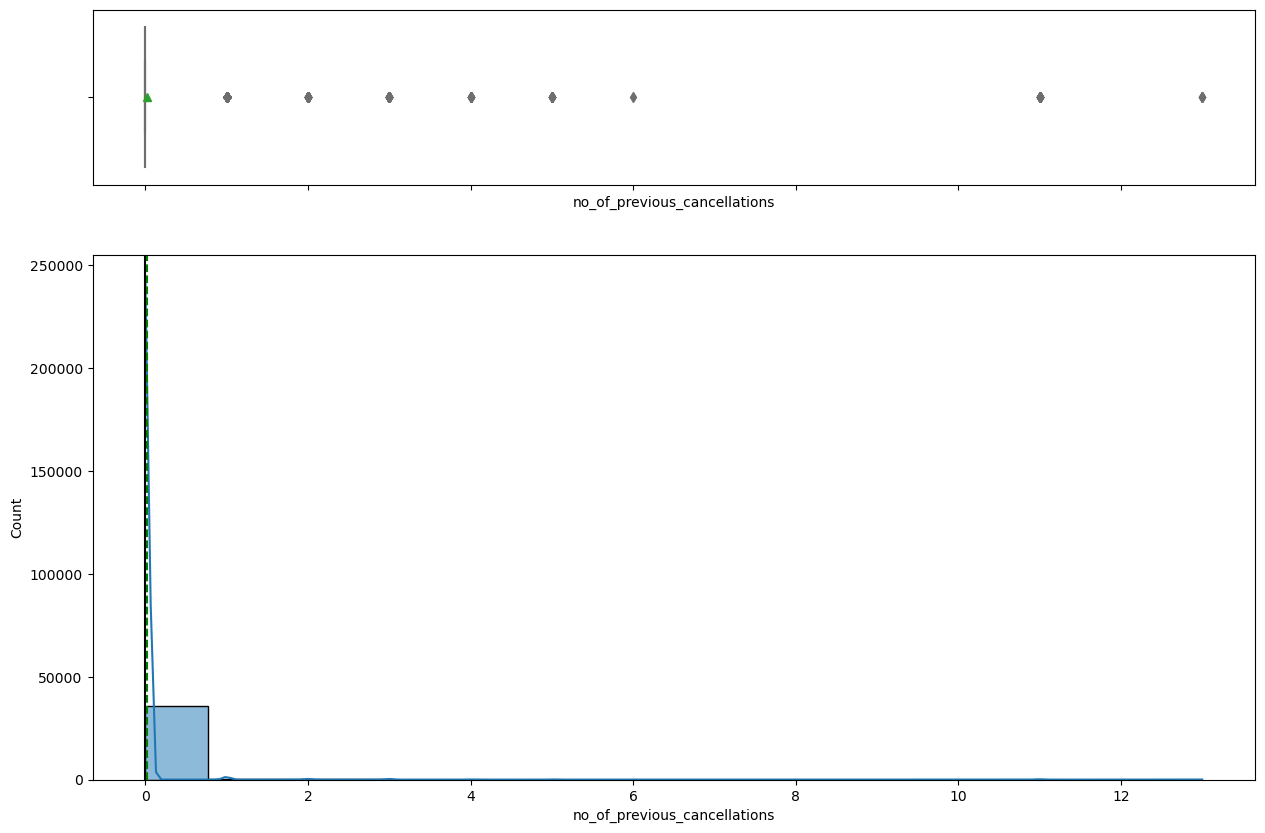

In [25]:
histogram_boxplot(df,"no_of_previous_cancellations",kde=True)

***Observation***
- Mojarity of the people are have no_of_previous_cancellations, But the there is one person with 13 times previous_cancellations

### Hist and box plot for no_of_previous_bookings_not_canceled

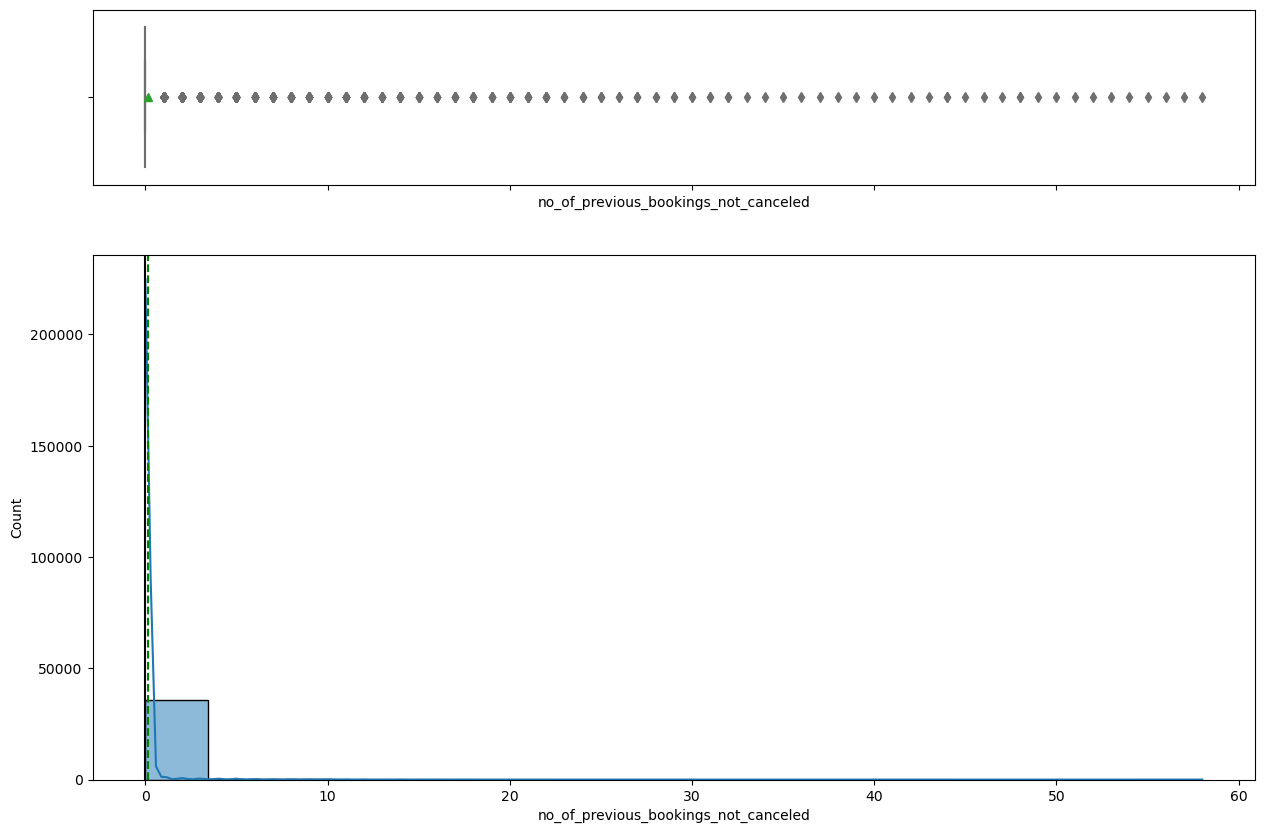

In [26]:
histogram_boxplot(df,"no_of_previous_bookings_not_canceled",kde=True)

***Observation***
- There are  nearly 35k people Number of previous bookings not canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled 36 is the max by a person 
- the data has more outliers 

### Hist plot and boxplot for avg_price_per_room

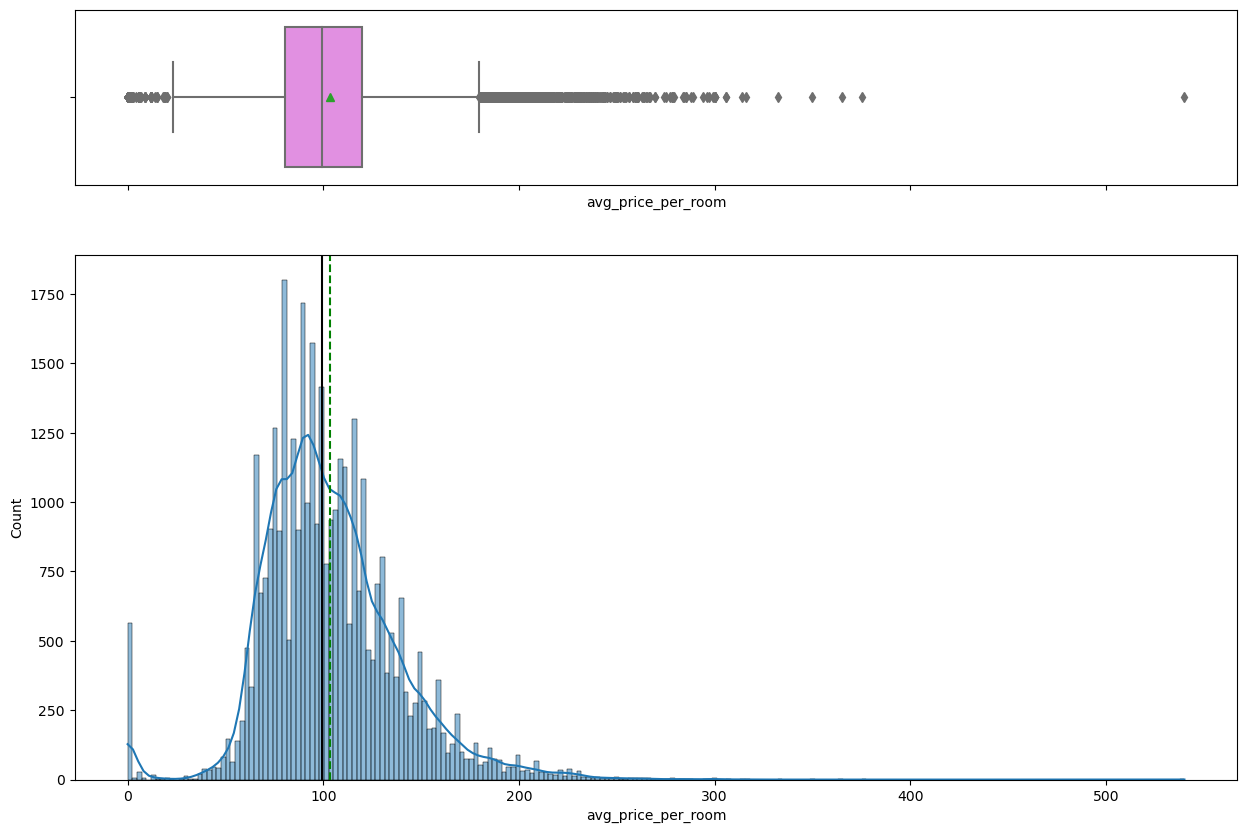

In [27]:
histogram_boxplot(df,"avg_price_per_room",kde=True)

***Observation***
- The avg avg_price_per_room is nearly 100 
- The max price is above 500k. the data is skewed to right 
- There is 0 avg_price_per_room needd to check and treat them accordingly 

### hist and box plot for no_of_special_requests

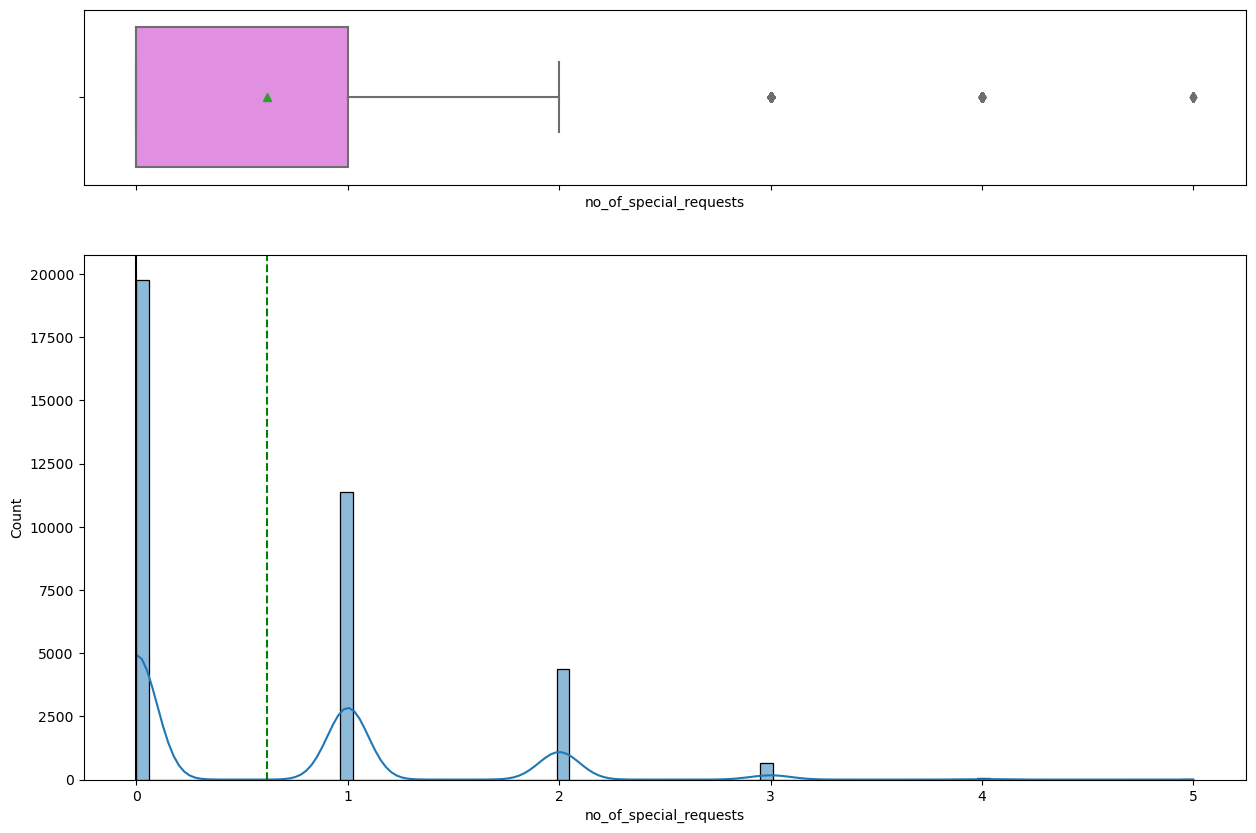

In [28]:
histogram_boxplot(df,"no_of_special_requests",kde=True)

***Observation***
- Majority of customers no_of_special_requests 
- max no_of_special_requests are 5 

### categorical plots 

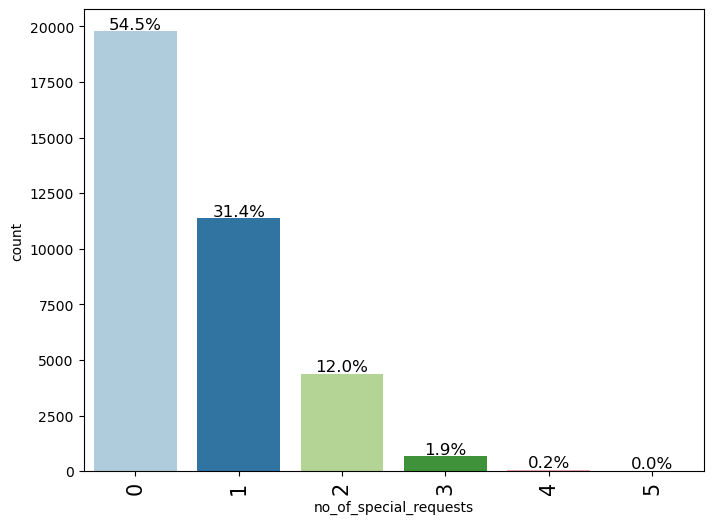

In [29]:
labeled_barplot(df,"no_of_special_requests",perc=True)

***Observation***
- There is 54.5% of no request and remaing 46.5% have the requests 

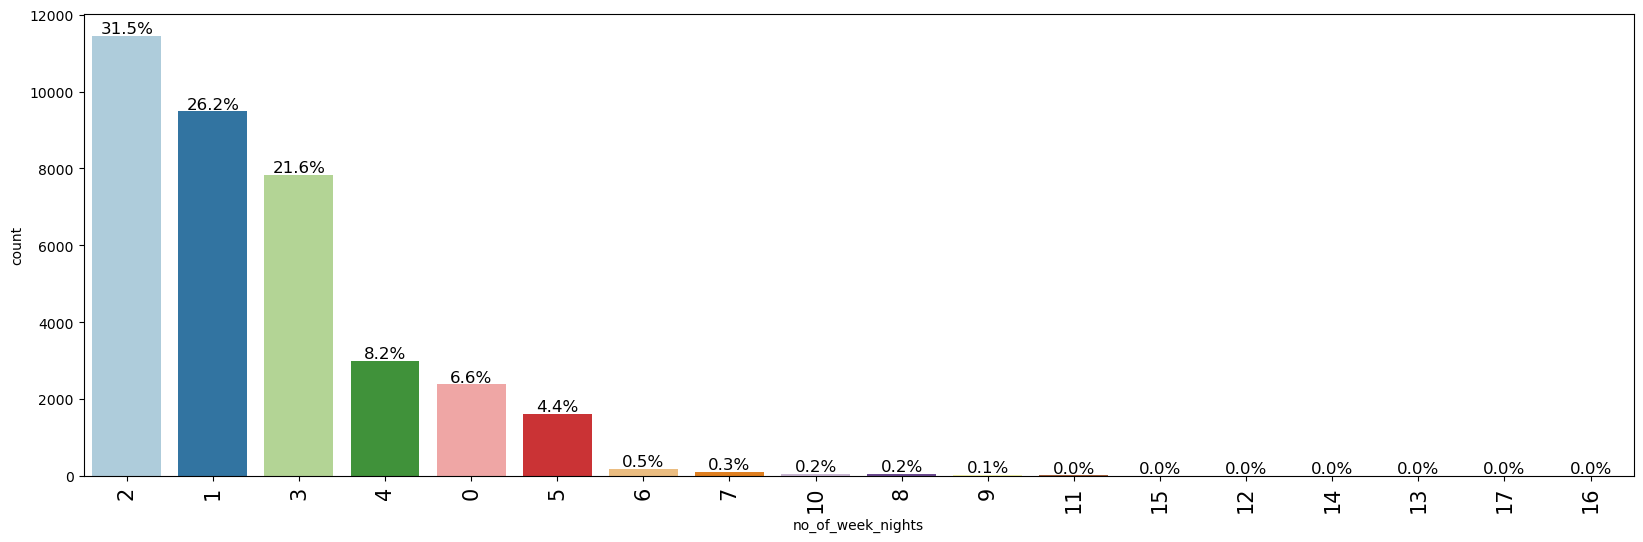

In [30]:
labeled_barplot(df,"no_of_week_nights",perc=True)

### cout plot for type_of_meal_plan 

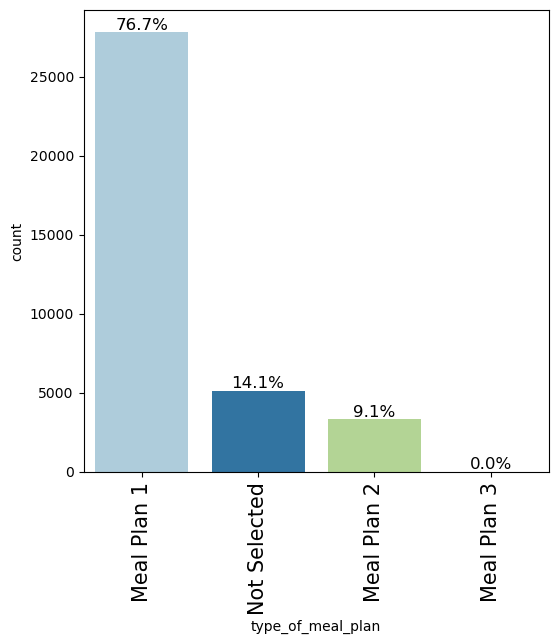

In [31]:
labeled_barplot(df,"type_of_meal_plan",perc=True)

***Observation***
- Majority of the customers opted the meal plan 1 
- Zero perc are opted for the Meal plan 3 

### cout plot for room_type_reserved 

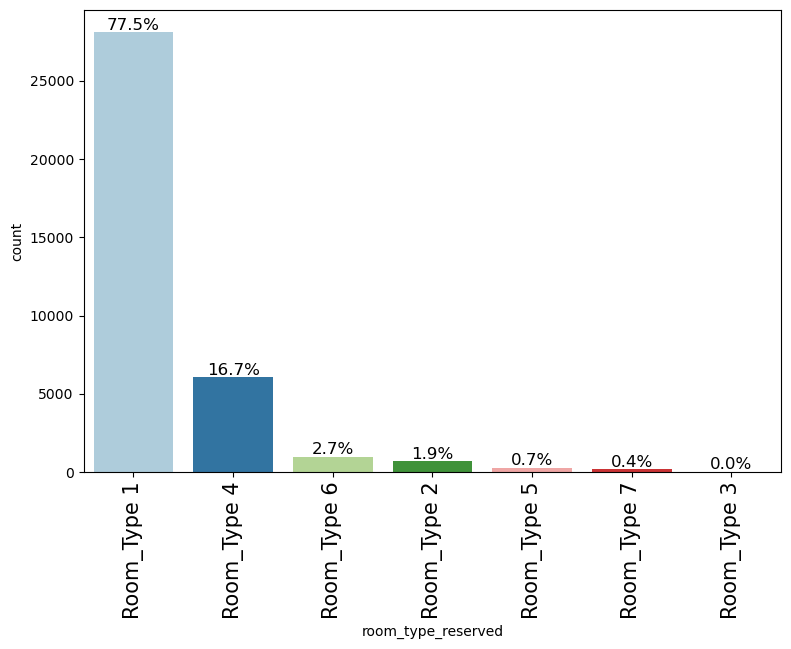

In [32]:
labeled_barplot(df,"room_type_reserved",perc=True)

***Observation***
- Majority of the people are opted for the Room_type1, followed by Room_type_4
- Room_type are ciphered by the company 

### cout plot for market_segment_type 
## Which market segment do most of the guests come from?

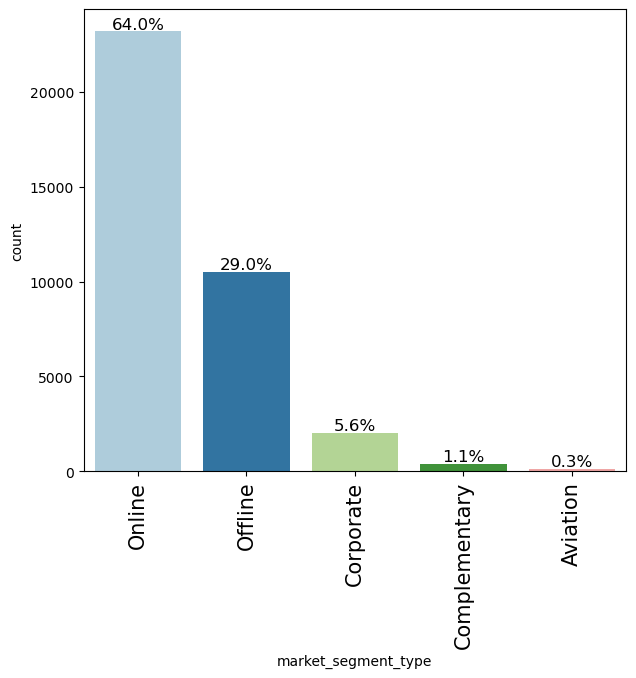

In [33]:
labeled_barplot(df,"market_segment_type",perc=True)

***Observation***
- The online market_segment done great job and followed by the offline 
- Aviation is the least among all 

### cout plot for booking_status 
### What percentage of bookings are canceled?

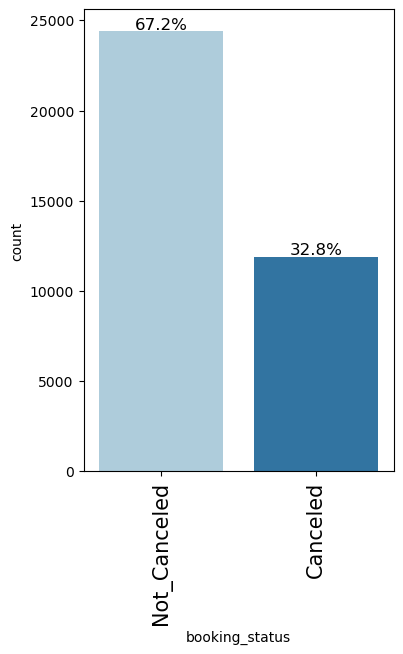

In [34]:
labeled_barplot(df,"booking_status",perc=True)

***Observation***
- Majority booking_status are not cancelled 67.2%
- canceled is 32.8%

### What are the busiest months in the hotel?

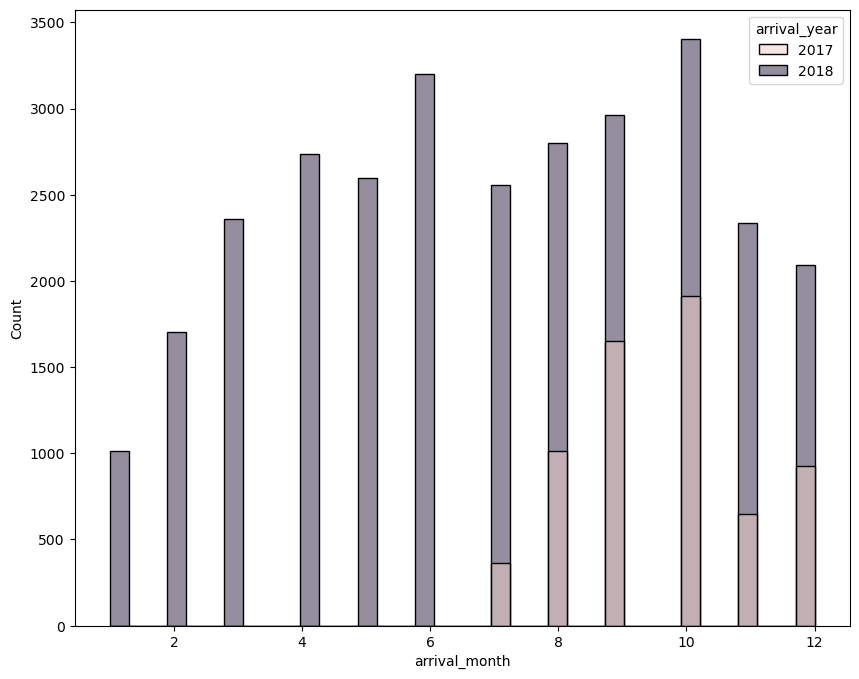

In [35]:
plt.figure(figsize=(10,8))
sns.histplot(df,x="arrival_month",hue="arrival_year");

In [36]:
df.groupby(["arrival_month"])["arrival_year"].value_counts()

arrival_month  arrival_year
1              2018            1014
2              2018            1704
3              2018            2358
4              2018            2736
5              2018            2598
6              2018            3203
7              2018            2557
               2017             363
8              2018            2799
               2017            1014
9              2018            2962
               2017            1649
10             2018            3404
               2017            1913
11             2018            2333
               2017             647
12             2018            2093
               2017             928
Name: count, dtype: int64

***Observation***
- The individually the 2018 `OCTOBER ` Busiest month with 3404, followed by 2018 `SEPTEMBER` with 2962

## Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

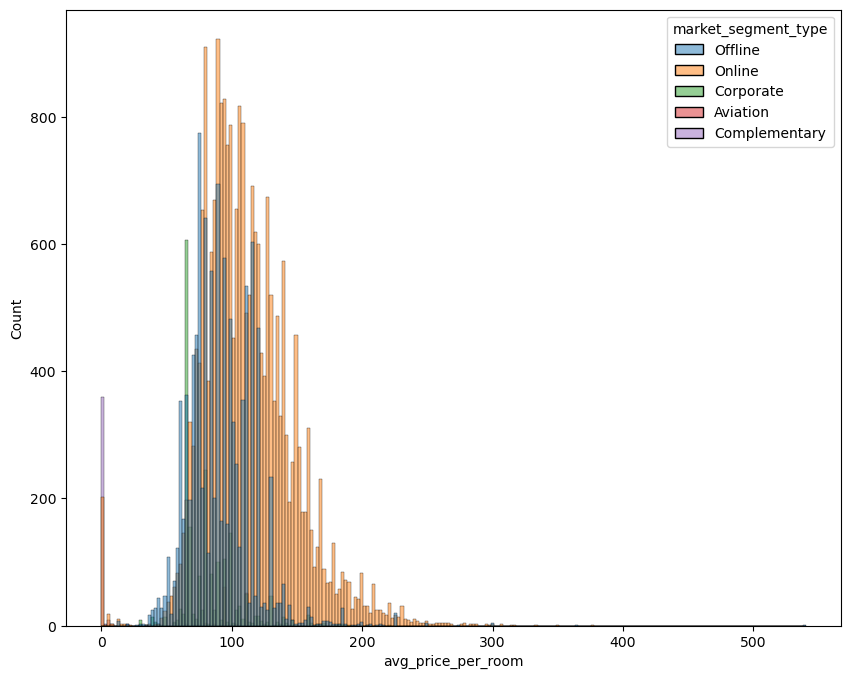

In [37]:
plt.figure(figsize=(10,8))
sns.histplot(df,x="avg_price_per_room",hue="market_segment_type");

In [38]:
df.groupby(["market_segment_type"])["avg_price_per_room"].sum()

market_segment_type
Aviation           12588.00
Complementary       1228.43
Corporate         167232.98
Offline           964708.84
Online           2605930.63
Name: avg_price_per_room, dtype: float64

***Observation***
- Online avg_price_per_room is highest comparing remaing market_segment_type

### Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

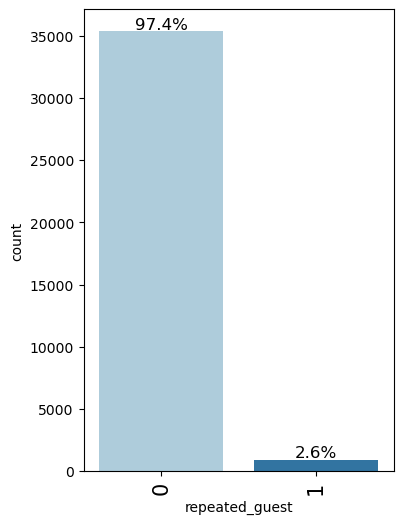

In [39]:
labeled_barplot(df,"repeated_guest",perc=True)

***Observation***
- The 2.6% of repeated_guest had cancelled 

### Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

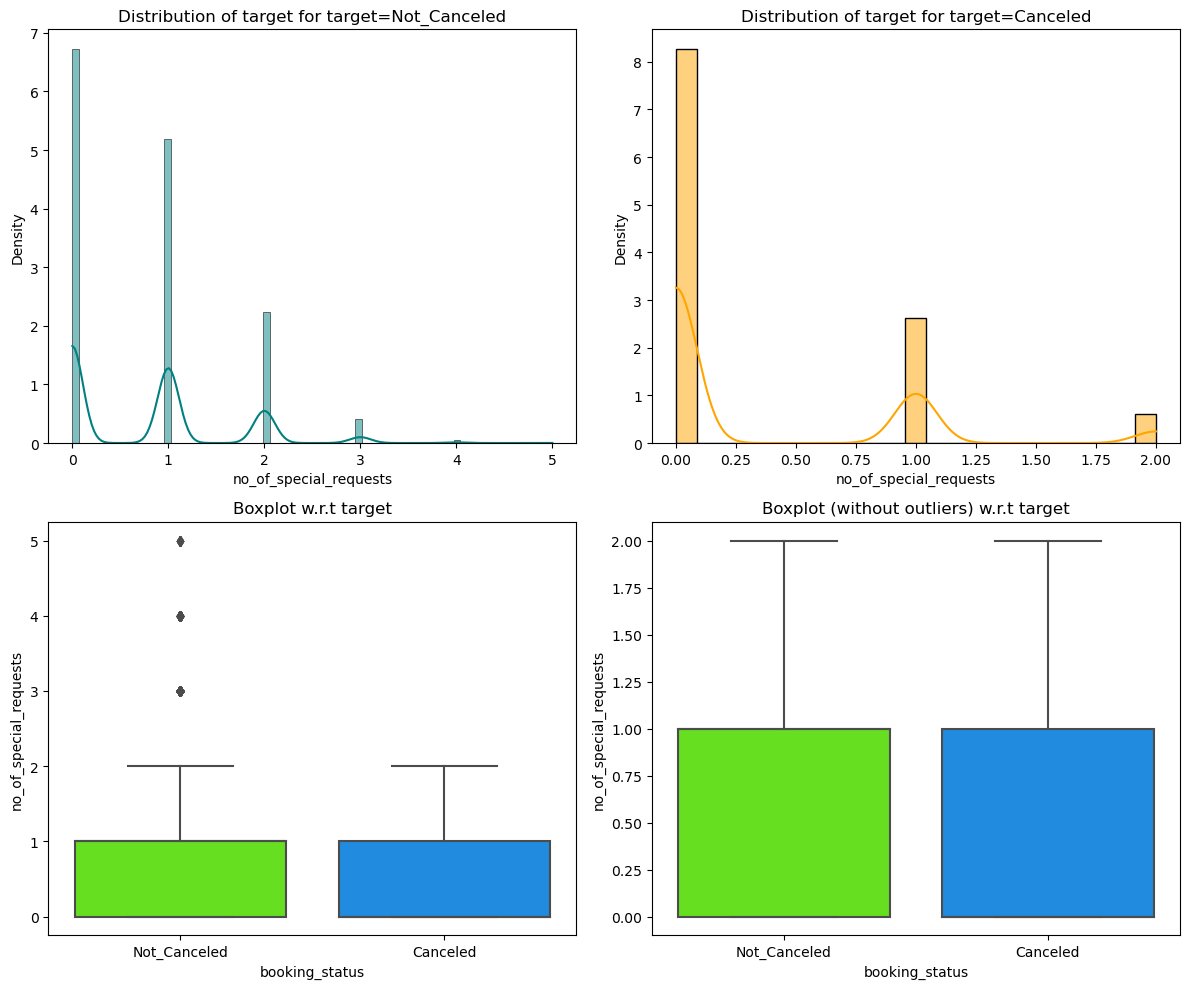

In [40]:
distribution_plot_wrt_target(df,"no_of_special_requests","booking_status")

In [41]:
df.groupby(["booking_status"])["no_of_special_requests"].value_counts()

booking_status  no_of_special_requests
Canceled        0                          8545
                1                          2703
                2                           637
Not_Canceled    0                         11232
                1                          8670
                2                          3727
                3                           675
                4                            78
                5                             8
Name: count, dtype: int64

***Observation***
- there no specific reason for the cancelation it shows 8545 has no special request 
- 3341 has 1 and 2 specical request  so they have cancelled 

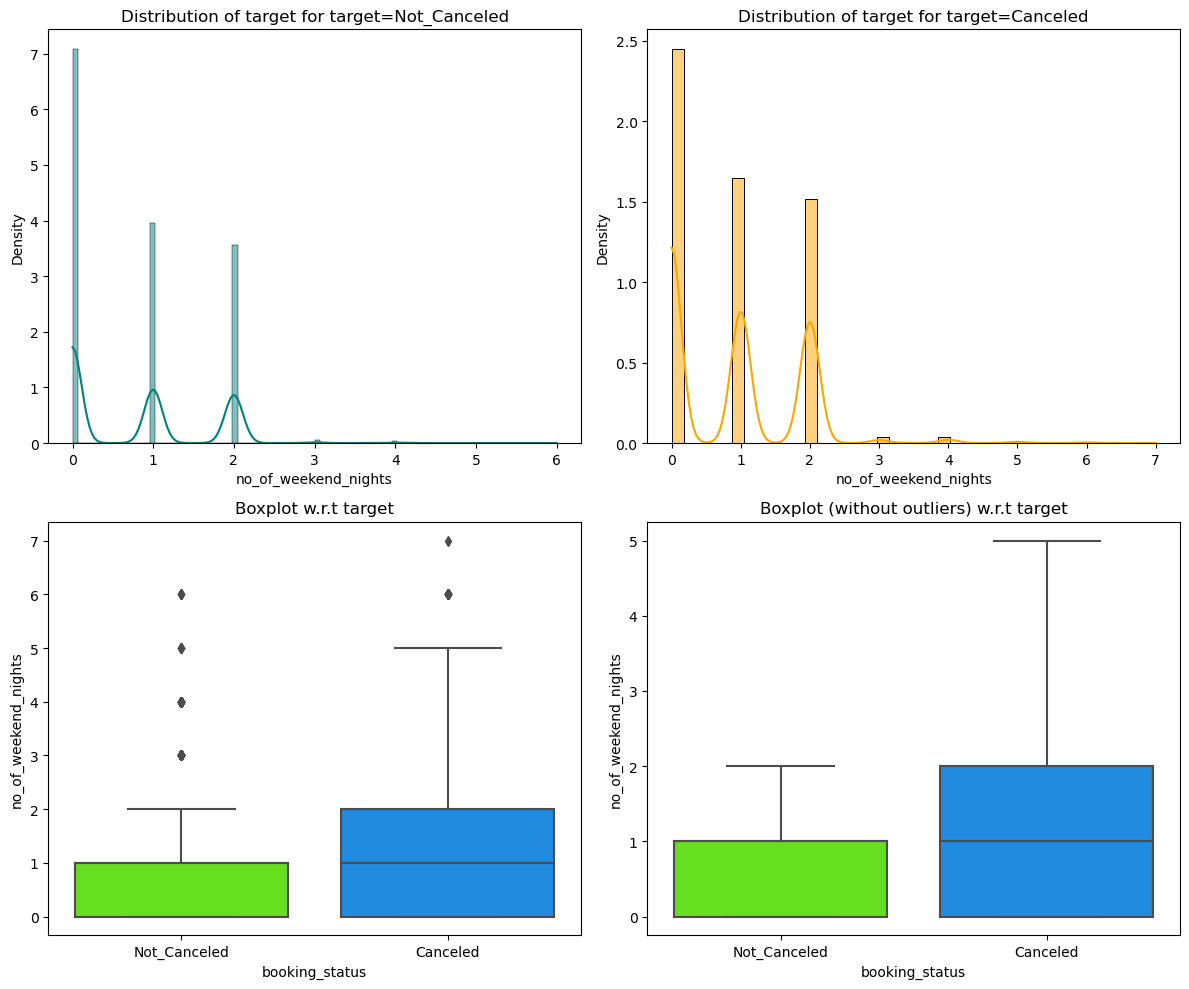

In [42]:
distribution_plot_wrt_target(df,"no_of_weekend_nights","booking_status")

***Observation***
- There are many cancelation on no_of_weekend_nights compared to non cancelled 

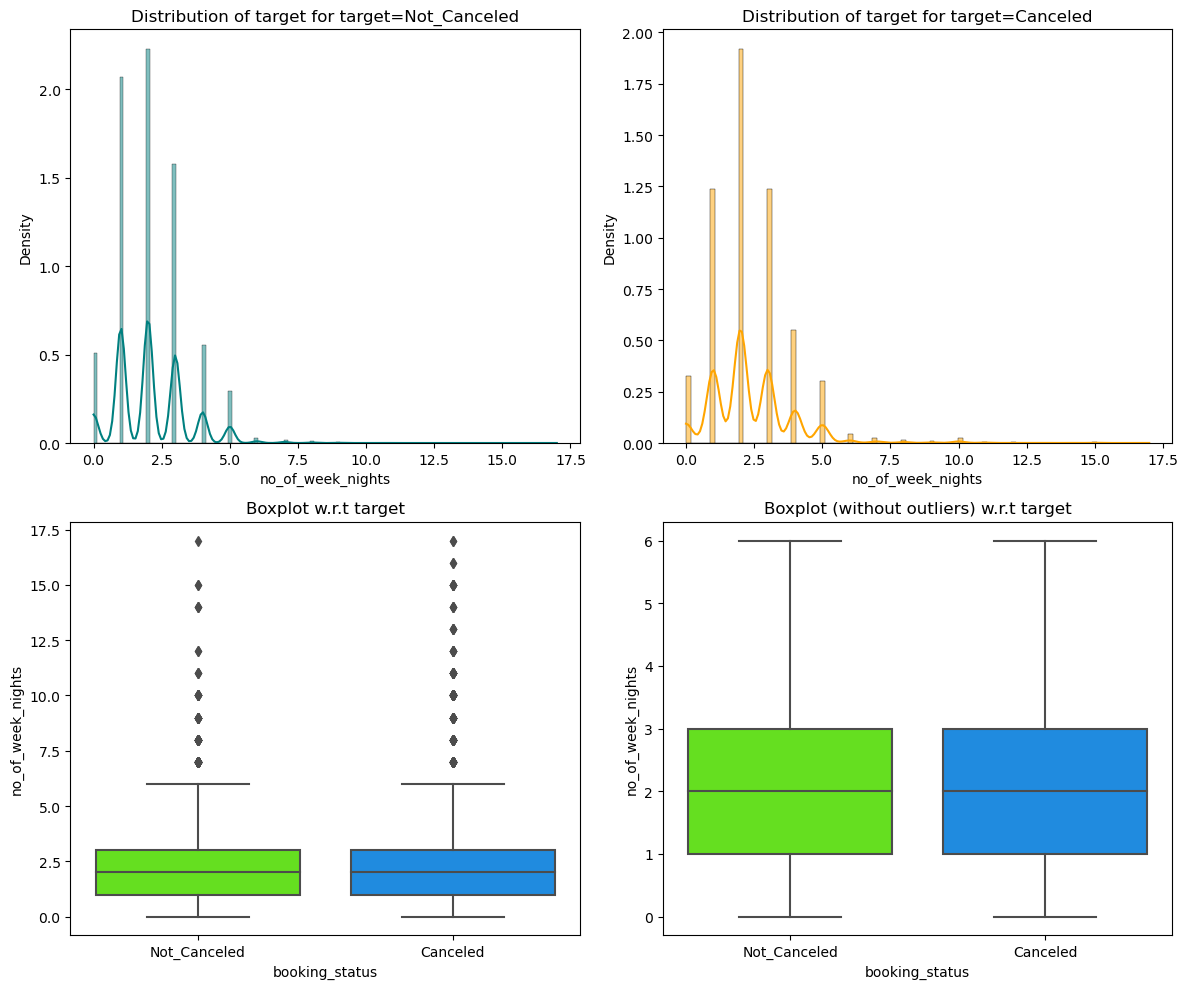

In [43]:
distribution_plot_wrt_target(df,"no_of_week_nights","booking_status")

***Observation***
- There is equal amount of canceled and the non-canceled  no_of_week_nights

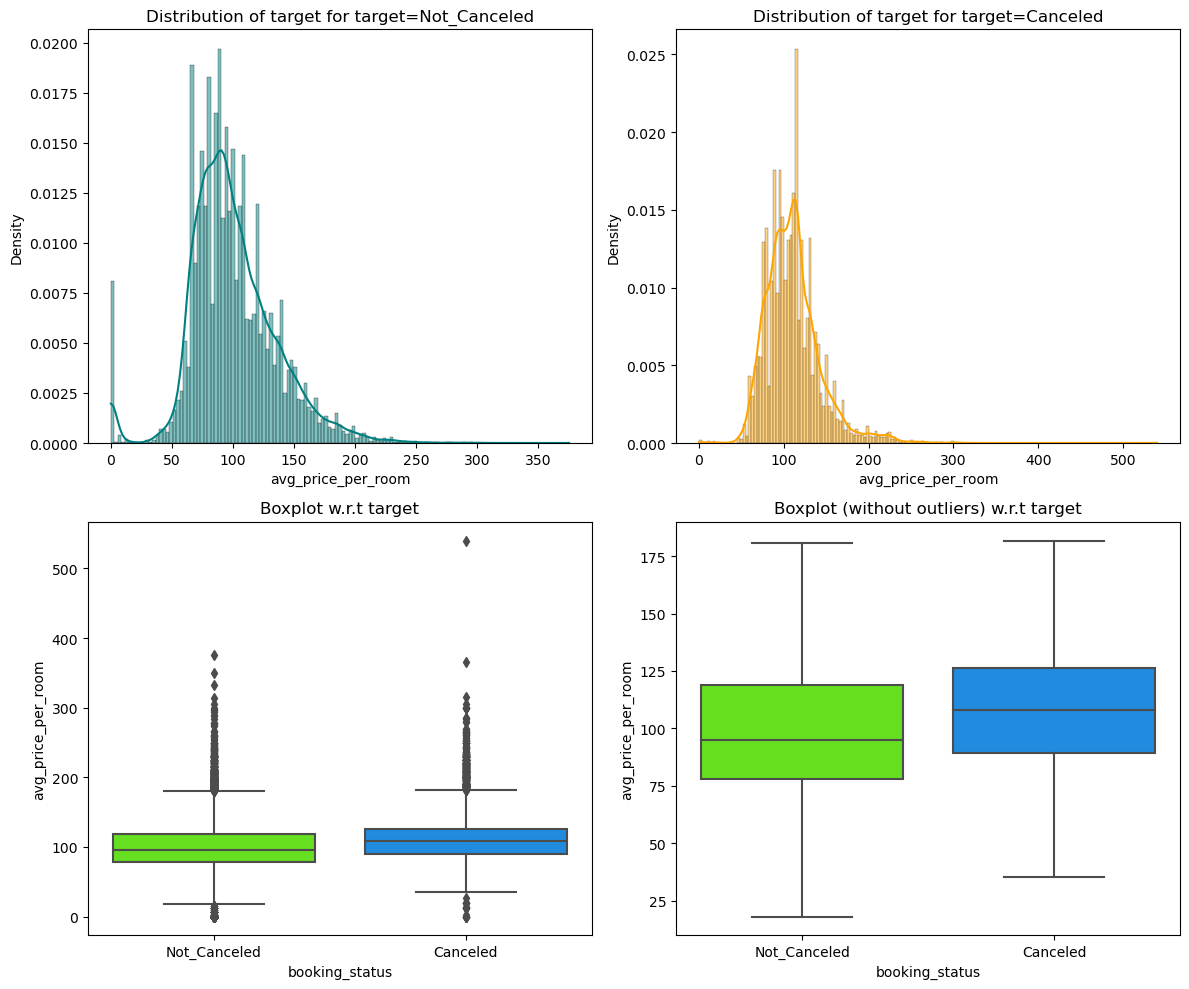

In [44]:
distribution_plot_wrt_target(df,"avg_price_per_room","booking_status")

***Observation***
- Need to know why there is 0 in the avg_price, even there is 0 dollars there are some cancelation. should assume there was a promotional campaign held previosly
- There is almost the same on the booking status 

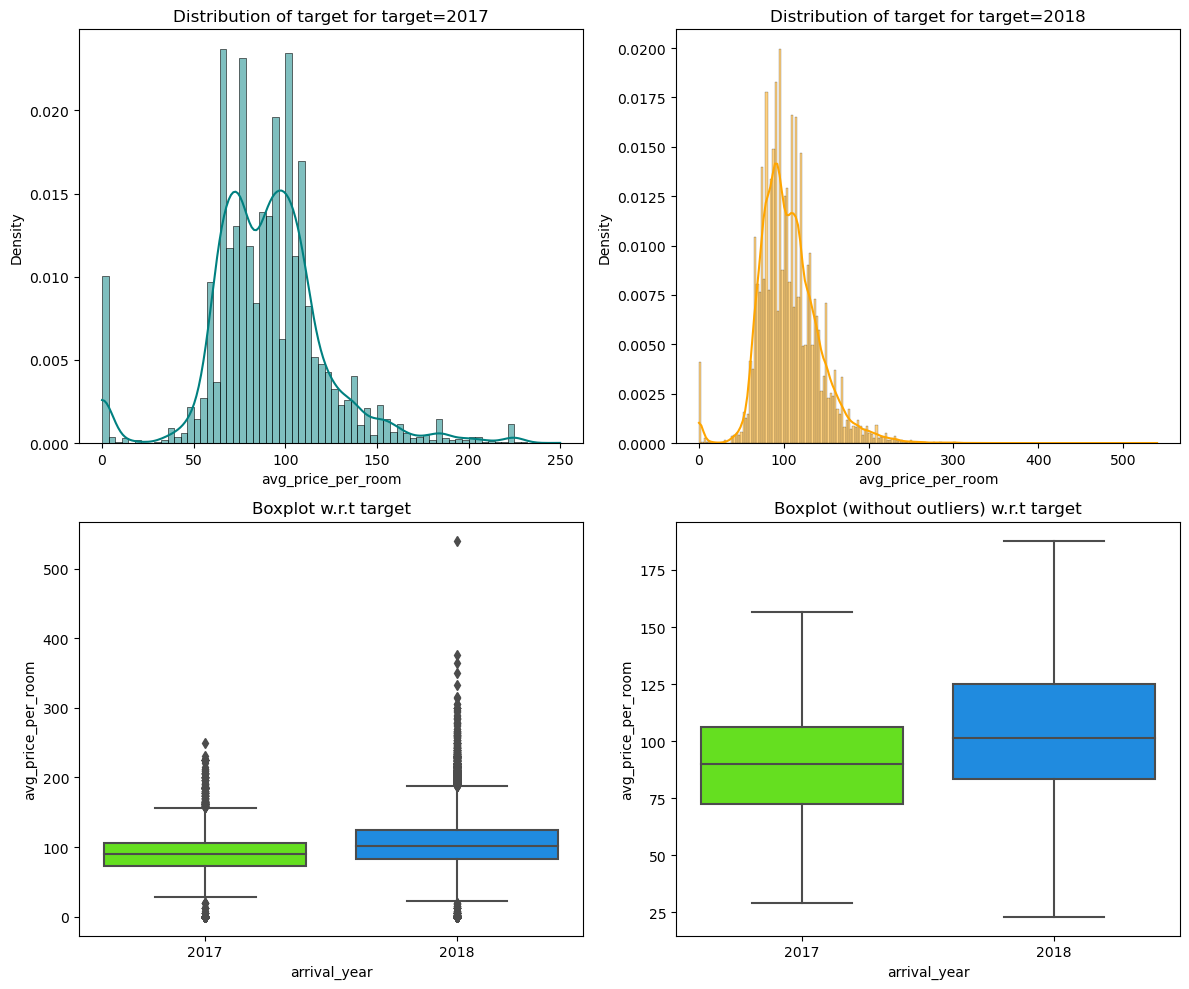

In [45]:
distribution_plot_wrt_target(df,"avg_price_per_room","arrival_year")

***Observation*** 
- There are `Zero`dollar on the both the years need to find in which month there were noted 
- 2018 there was move sale and more money generated compared to previos year 

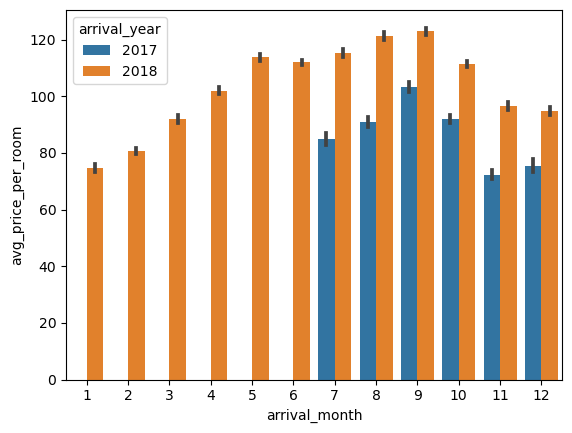

In [46]:
sns.barplot(df,x="arrival_month",y="avg_price_per_room",hue="arrival_year");

***Observation***
- It shows there is `Zero` dollars in all the month 
- the company started from the 7 month of 2017

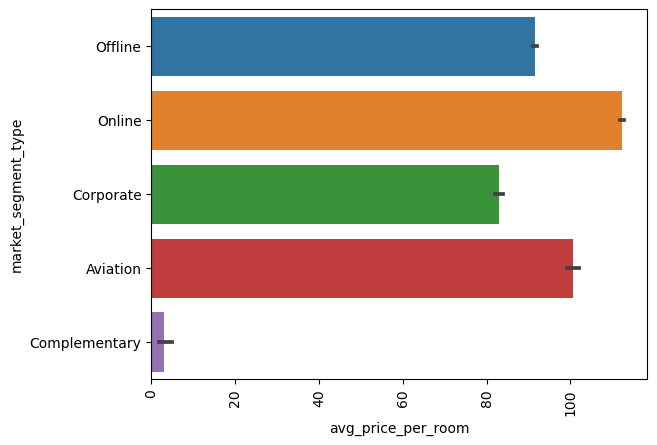

In [47]:
plt.xticks(rotation=90)
sns.barplot(df,x="avg_price_per_room",y="market_segment_type");

***Observation***
- The promotional campaign was held on each month with all type of the rooms 

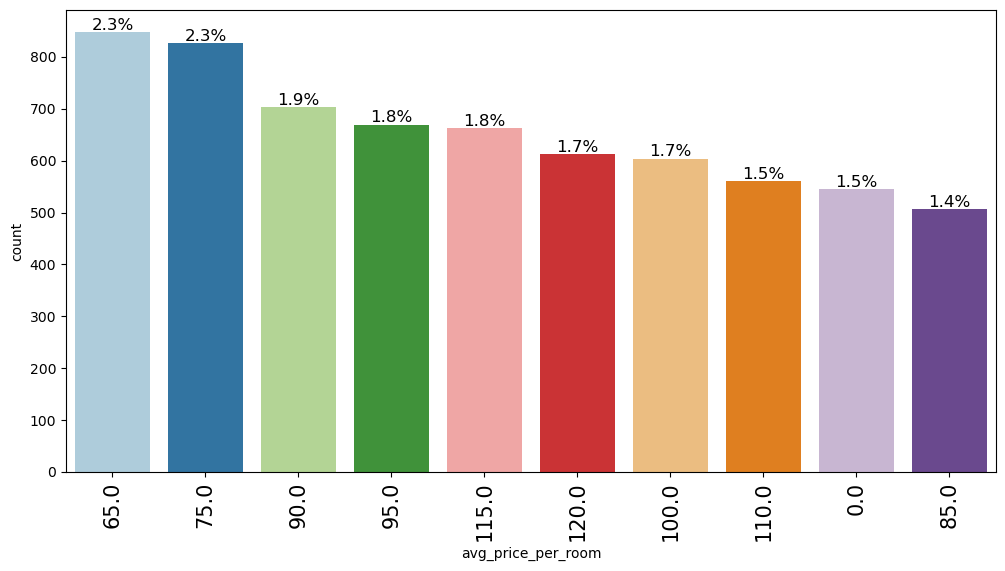

In [48]:

labeled_barplot(df,"avg_price_per_room",perc=True,n=10)

***Observation***
- 1.5 of the avg_price of a room is zero dollars 
- which will play significtent roll in the data which will cause outliers on the lower side of the whickers 

<Axes: >

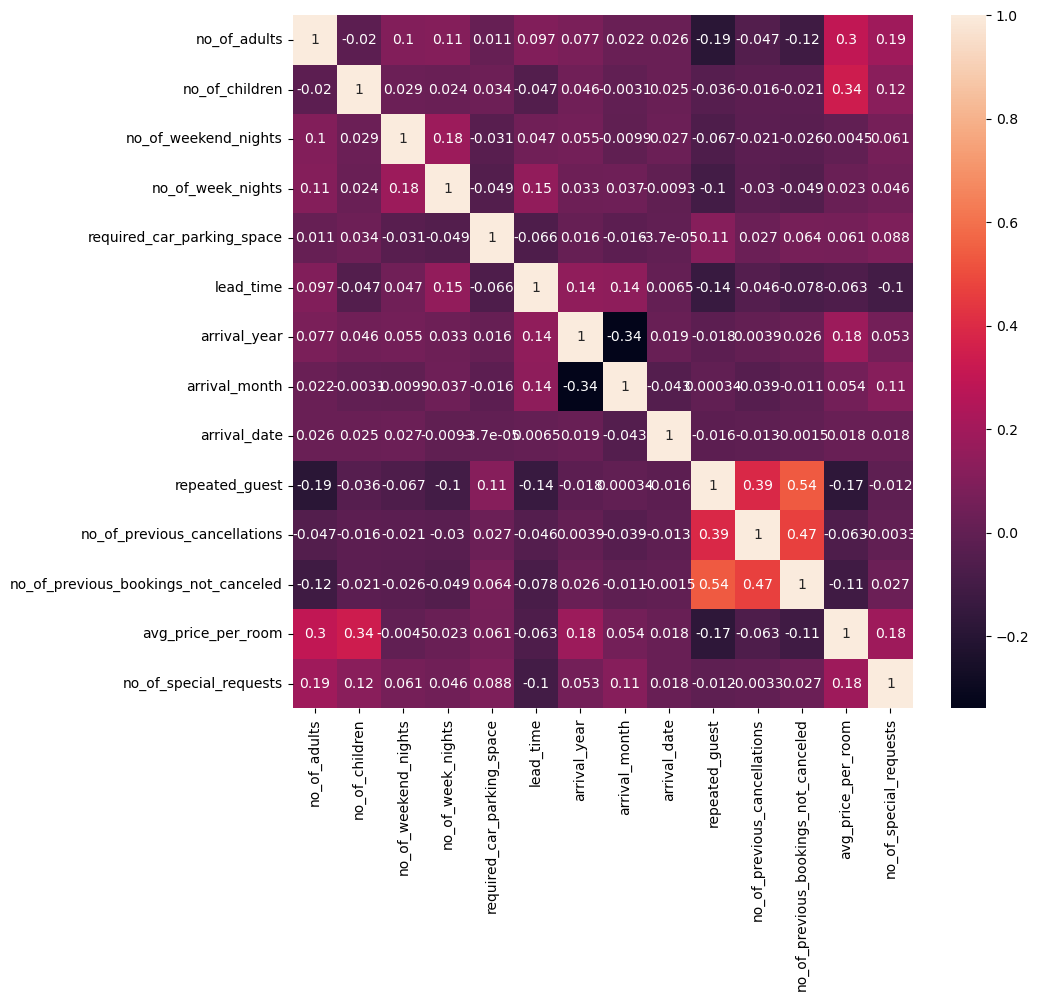

In [49]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(numeric_only=True),annot=True,cbar=True)

- There is no much information obtained from the heat map 
- There is good corelation b/w repeated_guest and no_of_previous_bookings_not_canceled
- There is significent relation b/w no_of_previous_bookings_not_canceled and no_of_previous_cancellations

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### - Missing value treatment (if needed)

In [50]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

***Observation***
- There are no nulls in the data 

### - Feature engineering 
- We found out there are 1.5% of zeros in the avg_cost we need to check the remaing outliers and treat them 

/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/41313

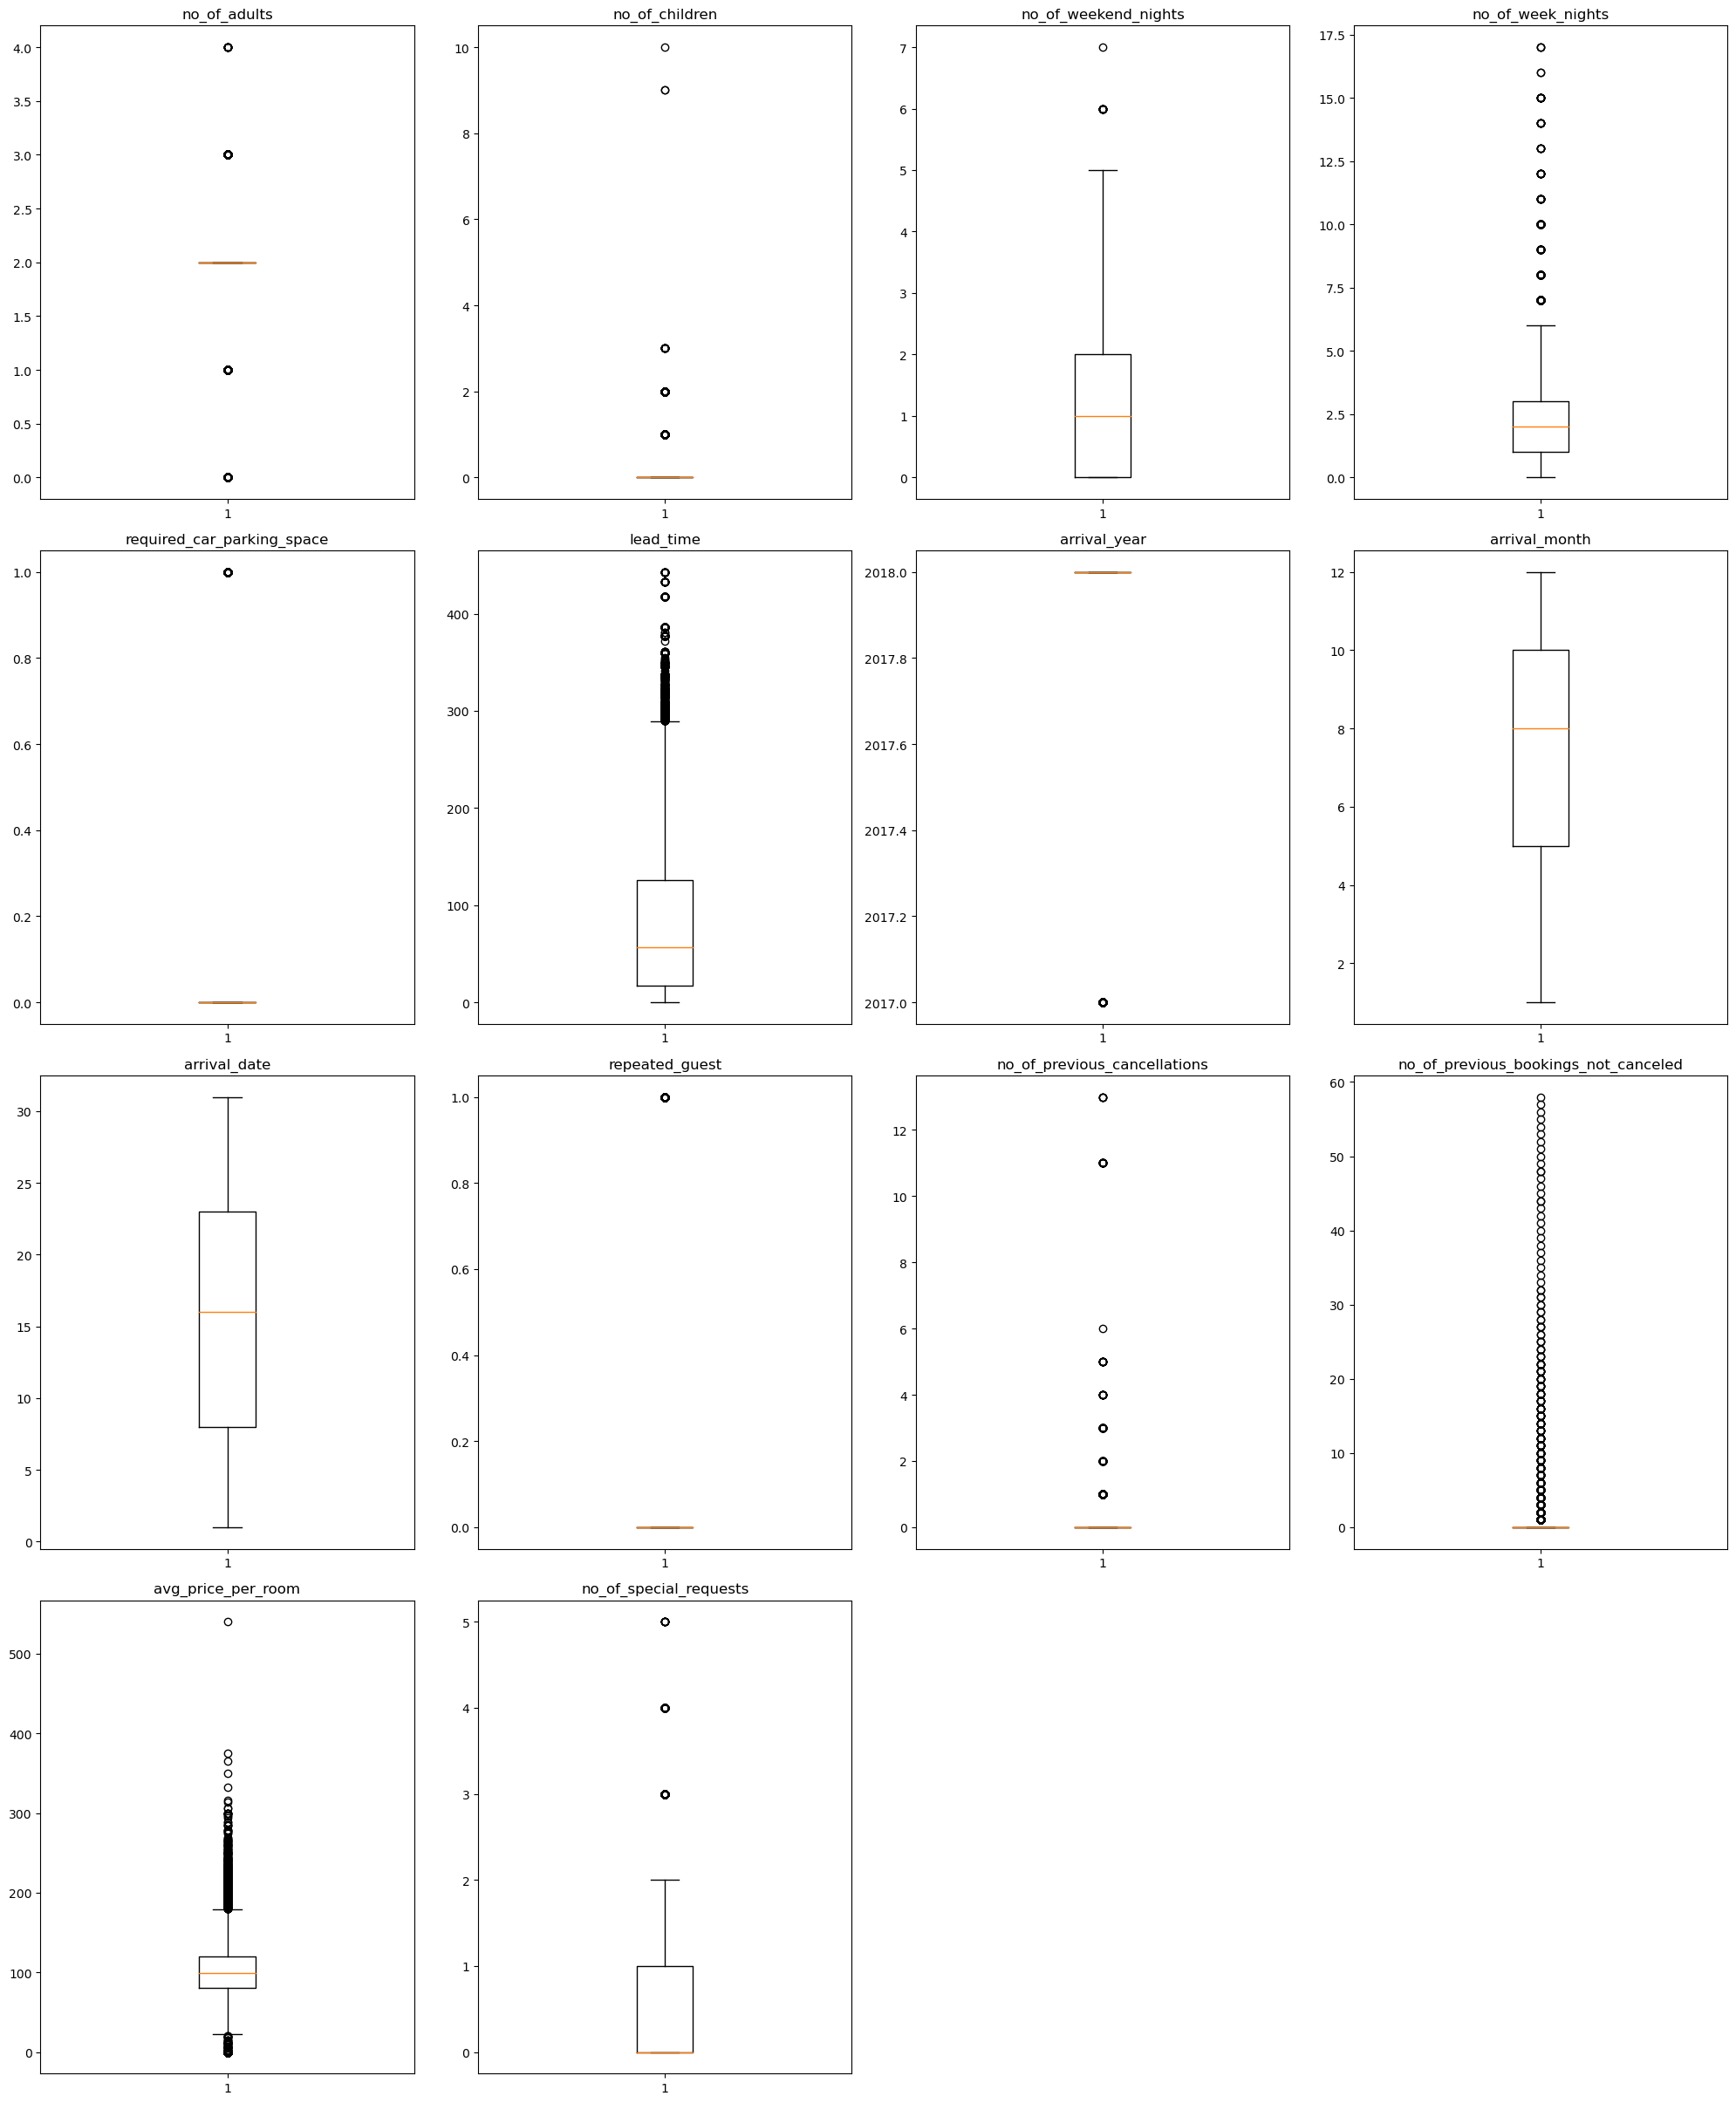

In [51]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- no_of_week_night,lead_time, no_ofprevious_cancelation,no_of_previous_booking_not cancelled and n0_of_special_requests have upper outliers.
- avg_cost_per_room has both upper and lower outliers
- arrival_date has no outliers 

### Treating the outliers for Avg_price_per_room 

- We are only doing for this because we saw Promotional campaign given 0 dollars
- Remaining are actual values 

In [52]:
Q1 = df["avg_price_per_room"].quantile(0.25)  # 25th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
df["avg_price_per_room"] = np.clip(df["avg_price_per_room"], Lower_Whisker, Upper_Whisker)
df["avg_price_per_room"].value_counts()

avg_price_per_room
179.55    1069
65.00      848
75.00      826
90.00      703
95.00      669
          ... 
102.86       1
143.99       1
90.44        1
120.91       1
167.80       1
Name: count, Length: 3513, dtype: int64

/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_93019/41313

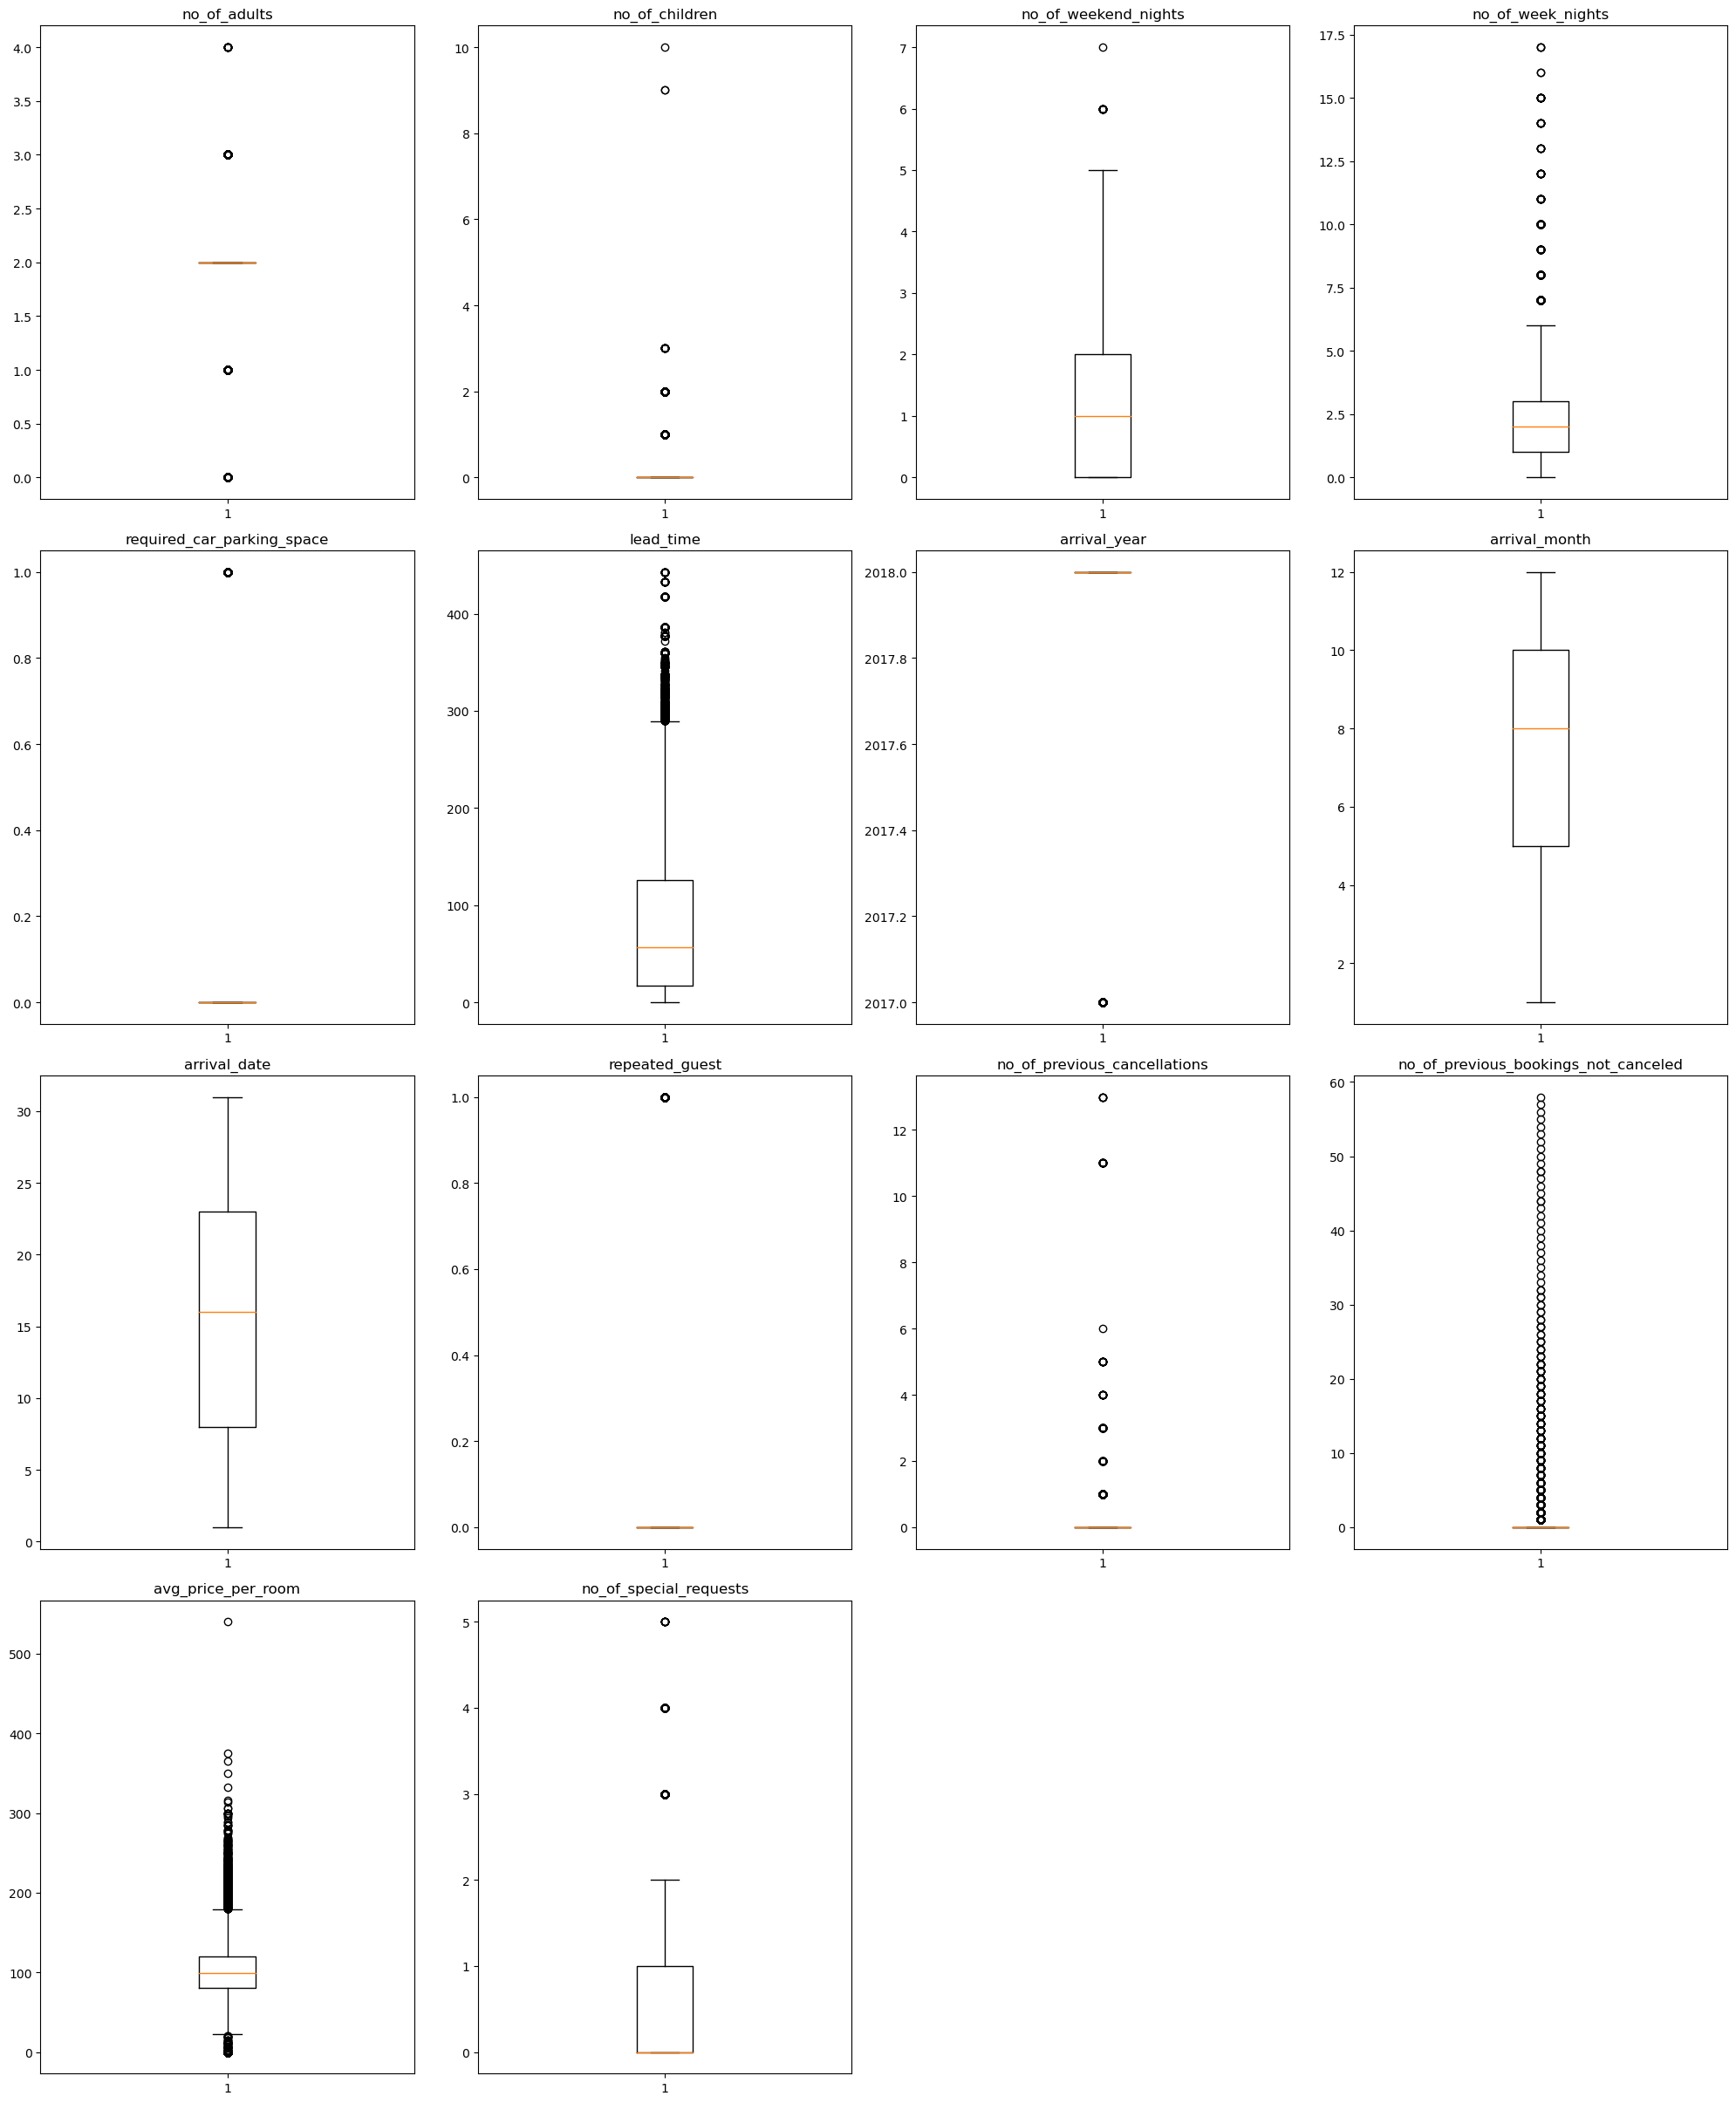

In [53]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Preparing data for modeling

### we are dropping Booking_ids

In [54]:
df=df.drop("Booking_ID",axis=1)
data=df.copy()

***We are reshaping the type_of_meal_plan, arrival_year, and  booking_status***
- ***Remaing we can use the dummpy***

In [55]:
df["booking_status"].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [56]:
reshape={
    "type_of_meal_plan":{"Not Selected":0,"Meal Plan 3":1,"Meal Plan 2":2,"Meal Plan 1":3},
    "arrival_year":{2017:0,2018:1},
    "booking_status":{"Not_Canceled":1,"Canceled":0}
}
df=df.replace(reshape)


### Preparing data for modeling
- ***what model we are doing?***
- Logit 
- Decisiontree 
- gvsearch
- ccp (cost- complex pruning)

In [57]:
X= df.drop("booking_status",axis=1)
Y =df["booking_status"]

***`lead_time` we are dividing with 365 which fraction if it is 1 then the year***  

In [58]:
X=pd.get_dummies(X,drop_first=1,dtype=float)
X["lead_time"]=X["lead_time"]/365
X["arrival_month"]=X["arrival_month"]/12
X["arrival_date"]=X["arrival_date"]/30
X

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

       type_of_meal_plan  required_car_parking_space  lead_time  arrival_year  \
0                      3                           0   0.613699             0   
1                      0                           0   0.013699             1   
2                      3                           0   0.002740             1   
3                      3                           0   0.578082             1   
4                      0                           0   0.131507             1   
...                  ...                         ...        ...           ...   
36270                  3                           0   0.232877             1   
36271                  3                           0   0.624658             1   
36272                  3                           0   0.405479             1   
36273                  0                           0   0.172603             1   
36274                  3                           0   0.567123             1   

       arrival_month  arrival_date  ...  room_type_reserved_Room_Type 2  \
0           0.833333      0.066667  ...                             0.0   
1           0.916667      0.200000  ...                             0.0   
2           0.166667      0.933333  ...                             0.0   
3           0.416667      0.666667  ...                             0.0   
4           0.333333      0.366667  ...                             0.0   
...              ...           ...  ...                             ...   
36270       0.666667      0.100000  ...                             0.0   
36271       0.833333      0.566667  ...                             0.0   
36272       0.583333      0.033333  ...                             0.0   
36273       0.333333      0.700000  ...                             0.0   
36274       1.000000      1.000000  ...                             0.0   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   
...                               ...                             ...   
36270                             0.0                             1.0   
36271                             0.0                             0.0   
36272                             0.0                             0.0   
36273                             0.0                             0.0   
36274                             0.0                             0.0   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3  

In [59]:
#adding the constant to X
X=sm.add_constant(X)
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)
y_train

13662    0
26641    1
17835    1
21485    0
5670     0
        ..
7813     0
32511    0
5192     0
12172    1
33003    0
Name: booking_status, Length: 25392, dtype: int64

In [60]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 26)
Shape of test set :  (10883, 26)
Percentage of classes in training set:
booking_status
1    0.670644
0    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
1    0.676376
0    0.323624
Name: proportion, dtype: float64


### Model Building - Logistic Regression
- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [61]:
logit =sm.Logit(y_train,x_train.astype(float)).fit()
logit.summary()

         Current function value: 0.425488
         Iterations: 35


/Users/saisampath/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Thu, 27 Jun 2024   Pseudo R-squ.:                  0.3286
Time:                        17:16:34   Log-Likelihood:                -10804.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    2.6922      0.274      9.825      0.000       2.155       3.229
no_of_adults                            -0.1132      0.038     -3.011      0.003      -0.187      -0.039
no_of_children                          -0.1689      0.057     -2.978      0.003      -0.280      -0.058
no_of_weekend_nights                    -0.1083      0.020     -5.482      0.000      -0.147      -0.070
no_of_week_nights                       -0.0413      0.012     -3.363      0.001      -0.065      -0.017
type_of_meal_plan                        0.1041      0.017      6.111      0.000       0.071       0.138
required_car_parking_space               1.5895      0.138     11.541      0.000       1.320       1.859
lead_time                               -5.7427      0.095    -60.236      0.000      -5.930      -5.556
arrival_year                            -0.4280      0.057     -7.472      0.000      -0.540      -0.316
arrival_month                            0.5175      0.077      6.724      0.000       0.367       0.668
arrival_date                            -0.0230      0.058     -0.396      0.692      -0.137       0.091
repeated_guest                           2.3368      0.614      3.806      0.000       1.133       3.540
no_of_previous_cancellations            -0.2674      0.086     -3.116      0.002      -0.436      -0.099
no_of_previous_bookings_not_canceled     0.1703      0.151      1.125      0.260      -0.126       0.467
avg_price_per_room                      -0.0203      0.001    -26.995      0.000      -0.022      -0.019
no_of_special_requests                   1.4672      0.030     48.850      0.000       1.408       1.526
room_type_reserved_Room_Type 2           0.3365      0.130      2.581      0.010       0.081       0.592
room_type_reserved_Room_Type 3           0.0102      1.304      0.008      0.994      -2.546       2.567
room_type_reserved_Room_Type 4           0.2986      0.053      5.597      0.000       0.194       0.403
room_type_reserved_Room_Type 5           0.7083      0.207      3.430      0.001       0.304       1.113
room_type_reserved_Room_Type 6           0.7382      0.143      5.161      0.000       0.458       1.019
room_type_reserved_Room_Type 7           0.7851      0.278      2.825      0.005       0.240       1.330
market_segment_type_Complementary       24.1334   1.97e+04      0.001      0.999   -3.85e+04    3.86e+04
market_segment_type_Corporate            1.1990      0.266      4.503      0.000       0.677       1.721
market_segment_type_Offline              2.1792      0.255      8.556      0.000       1.680       2.678
market_segment_type_Online               0.4246      0.251      1.690      0.091      -0.068       0.917
========================================================================================================
"""

***Observation***
- Negative values of the coefficient show that the probability of a customer cancelation decreases with the increase of the corresponding attribute value.
- Positive values of the coefficient show that the probability of a customer non-cancelation increases with the increase of the corresponding attribute value.

### Model Performance Evaluation
**Model can make wrong predictions as**:

1. Predicting a customer has cancel but in reality the customer  has not cancelled.

2. Predicting a customer doesn't cancel but in reality the salary of the person canceled.

**Which case is more important?**

* Both the cases are important as:

  * If we Predicting a customer has cancel but in reality the customer has not cancelled then hostel need to accommodate the person or hotel will loss the customer.

  * If we Predicting a customer doesn't cancel but in reality the customer  canceled then hotel will loss the money.


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$
  
- First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

- The model_performance_classification_statsmodels function will be used to check the model performance of models.
- The confusion_matrix_statsmodels function will be used to plot confusion matri

In [62]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [63]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")


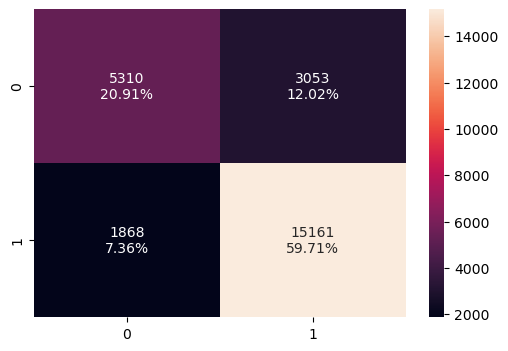

In [64]:
confusion_matrix_statsmodels(logit, x_train, y_train)

In [65]:
model_performance_classification_statsmodels(logit, x_train, y_train)

Accuracy    Recall  Precision        F1
0  0.806199  0.890305   0.832382  0.860369

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

### Detecting and Dealing with Multicollinearity
- There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   348.433190
no_of_adults                              1.348132
no_of_children                            1.973657
no_of_weekend_nights                      1.070623
no_of_week_nights                         1.095579
type_of_meal_plan                         1.188328
required_car_parking_space                1.039478
lead_time                                 1.291497
arrival_year                              1.329717
arrival_month                             1.253737
arrival_date                              1.006218
repeated_guest                            1.783500
no_of_previous_cancellations              1.395514
no_of_previous_bookings_not_canceled      1.651117
avg_price_per_room                        1.788745
no_of_special_requests                    1.247244
room_type_reserved_Room_Type 2            1.102329
room_type_reserved_Room_Type 3            1.003154
room_type_reserved_Room_Type 4            1.371

***Observation***
* `market_segment_type_Online`, `market_segment_type_Offline` and `market_segment_type_Corporate` are from categorical from `market_segment_type`

* We will drop `market_segment_type_Online` as we get the same information from `market_segment_type_Offline`

In [67]:
x_train1 = x_train.drop("market_segment_type_Online", axis=1)
x_test1=x_test.drop("market_segment_type_Online",axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                   53.477494
no_of_adults                             1.331605
no_of_children                           1.972786
no_of_weekend_nights                     1.070192
no_of_week_nights                        1.095085
type_of_meal_plan                        1.187112
required_car_parking_space               1.039349
lead_time                                1.288229
arrival_year                             1.327989
arrival_month                            1.252913
arrival_date                             1.006197
repeated_guest                           1.780119
no_of_previous_cancellations             1.395262
no_of_previous_bookings_not_canceled     1.650896
avg_price_per_room                       1.788368
no_of_special_requests                   1.242460
room_type_reserved_Room_Type 2           1.102157
room_type_reserved_Room_Type 3           1.003154
room_type_reserved_Room_Type 4           1.365705
room_type_reser

***Dropping market_segment_type_Online fixes the multicollinearity in market_segment_type column.***

## Building a Logistic Regression model

In [68]:
logit_1=sm.Logit(y_train,x_train1.astype(float)).fit()
logit_1.summary()


         Current function value: 0.425542
         Iterations: 35


/Users/saisampath/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           24
Date:                Thu, 27 Jun 2024   Pseudo R-squ.:                  0.3285
Time:                        17:16:36   Log-Likelihood:                -10805.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    3.1033      0.127     24.351      0.000       2.853       3.353
no_of_adults                            -0.1053      0.037     -2.824      0.005      -0.178      -0.032
no_of_children                          -0.1667      0.057     -2.938      0.003      -0.278      -0.055
no_of_weekend_nights                    -0.1092      0.020     -5.527      0.000      -0.148      -0.070
no_of_week_nights                       -0.0420      0.012     -3.421      0.001      -0.066      -0.018
type_of_meal_plan                        0.1031      0.017      6.055      0.000       0.070       0.136
required_car_parking_space               1.5862      0.138     11.517      0.000       1.316       1.856
lead_time                               -5.7330      0.095    -60.291      0.000      -5.919      -5.547
arrival_year                            -0.4315      0.057     -7.540      0.000      -0.544      -0.319
arrival_month                            0.5126      0.077      6.667      0.000       0.362       0.663
arrival_date                            -0.0234      0.058     -0.402      0.687      -0.137       0.091
repeated_guest                           2.3019      0.616      3.740      0.000       1.096       3.508
no_of_previous_cancellations            -0.2642      0.086     -3.079      0.002      -0.432      -0.096
no_of_previous_bookings_not_canceled     0.1704      0.151      1.130      0.258      -0.125       0.466
avg_price_per_room                      -0.0202      0.001    -26.966      0.000      -0.022      -0.019
no_of_special_requests                   1.4691      0.030     48.949      0.000       1.410       1.528
room_type_reserved_Room_Type 2           0.3397      0.130      2.605      0.009       0.084       0.595
room_type_reserved_Room_Type 3           0.0114      1.304      0.009      0.993      -2.545       2.567
room_type_reserved_Room_Type 4           0.2924      0.053      5.493      0.000       0.188       0.397
room_type_reserved_Room_Type 5           0.7090      0.206      3.434      0.001       0.304       1.114
room_type_reserved_Room_Type 6           0.7341      0.143      5.132      0.000       0.454       1.014
room_type_reserved_Room_Type 7           0.7796      0.278      2.806      0.005       0.235       1.324
market_segment_type_Complementary       23.7802   2.03e+04      0.001      0.999   -3.97e+04    3.98e+04
market_segment_type_Corporate            0.7834      0.103      7.605      0.000       0.581       0.985
market_segment_type_Offline              1.7570      0.050     35.251      0.000       1.659       1.855
========================================================================================================
"""

In [69]:
print("Training Performance")
model_performance_classification_statsmodels(logit_1, x_train1, y_train)

Training Performance


Accuracy    Recall  Precision        F1
0   0.80612  0.890129     0.8324  0.860297

### Removing high p-value variables

* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficien

In [70]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/Users/saisampath/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [71]:
x_test2=x_test1[selected_features]
x_train2=x_train1[selected_features]
logit_2=sm.Logit(y_train,x_train2.astype(float)).fit()
logit_2.summary()

Optimization terminated successfully.
         Current function value: 0.426153
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Thu, 27 Jun 2024   Pseudo R-squ.:                  0.3275
Time:                        17:16:38   Log-Likelihood:                -10821.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.1343      0.123     25.435      0.000       2.893       3.376
no_of_adults                      -0.1085      0.037     -2.912      0.004      -0.181      -0.035
no_of_children                    -0.1654      0.057     -2.919      0.004      -0.276      -0.054
no_of_weekend_nights              -0.1106      0.020     -5.602      0.000      -0.149      -0.072
no_of_week_nights                 -0.0435      0.012     -3.548      0.000      -0.068      -0.019
type_of_meal_plan                  0.1062      0.017      6.245      0.000       0.073       0.139
required_car_parking_space         1.5890      0.138     11.534      0.000       1.319       1.859
lead_time                         -5.7438      0.095    -60.527      0.000      -5.930      -5.558
arrival_year                      -0.4299      0.057     -7.517      0.000      -0.542      -0.318
arrival_month                      0.5257      0.077      6.854      0.000       0.375       0.676
repeated_guest                     2.7222      0.556      4.900      0.000       1.633       3.811
no_of_previous_cancellations      -0.2300      0.077     -2.999      0.003      -0.380      -0.080
avg_price_per_room                -0.0206      0.001    -27.825      0.000      -0.022      -0.019
no_of_special_requests             1.4681      0.030     48.947      0.000       1.409       1.527
room_type_reserved_Room_Type 2     0.3320      0.130      2.549      0.011       0.077       0.587
room_type_reserved_Room_Type 4     0.2980      0.053      5.601      0.000       0.194       0.402
room_type_reserved_Room_Type 5     0.7253      0.206      3.527      0.000       0.322       1.128
room_type_reserved_Room_Type 6     0.7500      0.143      5.247      0.000       0.470       1.030
room_type_reserved_Room_Type 7     0.8070      0.277      2.915      0.004       0.264       1.350
market_segment_type_Corporate      0.7710      0.103      7.493      0.000       0.569       0.973
market_segment_type_Offline        1.7476      0.050     35.094      0.000       1.650       1.845
==================================================================================================
"""

### Coefficient Interpretations
* Coefficient of some levels of `required_car_parking_space`, `repeated_guest`,`no_of_special_requests` and `market_segment_type_Offline` are positive an increase in these will lead to increase in chances of a customer not-Cancel.

* Coefficient of `lead_time`, `arrival_month`, `no_of_week_nights`, `no_of_weekend_nights`, `no_of_children`, `no_of_adults`, and `no_of_previous_cancellations` are negative increase in these will lead to cancelation.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [72]:
# converting coefficients to odds
odds = np.exp(logit_2.params)

# finding the percentage change
perc_change_odds = (np.exp(logit_2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train2.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           22.973693      0.897205        0.847532              0.895331   
Change_odd%  2197.369274    -10.279455      -15.246836            -10.466923   

             no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
Odds                  0.957387           1.112012                    4.898696   
Change_odd%          -4.261319          11.201237                  389.869562   

             lead_time  arrival_year  arrival_month  repeated_guest  \
Odds          0.003203      0.650573       1.691711       15.213906   
Change_odd% -99.679742    -34.942681      69.171085     1421.390568   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                             0.794540            0.979585   
Change_odd%                    -20.546044           -2.041503   

             no_of_special_requests  room_type_reserved_Room_Type 2  \
Odds                       4.341145                        1.393688   
Change_odd%              334.114529                       39.368827   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                               1.347141                        2.065387   
Change_odd%                       34.714093                      106.538727   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                               2.117042                        2.241251   
Change_odd%                      111.704190                      124.125115   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                              2.161966                     5.740588  
Change_odd%                     116.196564                   474.058829

**Coefficient interpretations**

* `market_segment_type_Offline`: Holding all other features constant a 1 unit change in market_segment_type_Offline will increase the odds of a customer not-cancel by ~5.74 times or a ~474% increase in odds of not-cancelling.
* `required_car_parking_space`: Holding all other features constant a 1 unit change in market_segment_type_Offline will increase the odds of a customer not-cancel by ~4.9 times or a ~390% increase in odds of not-cancelling.

## Model performance evaluation
### Training set performance

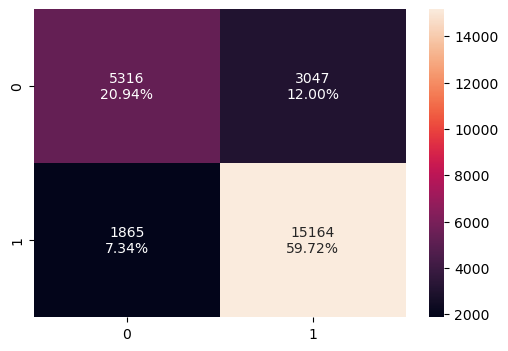

In [73]:
confusion_matrix_statsmodels(logit_2, x_train2, y_train)

In [74]:
log_reg_model_train_perf=model_performance_classification_statsmodels(logit_2, x_train2, y_train)
print("Training modelperformance")
log_reg_model_train_perf

Training modelperformance


Accuracy    Recall  Precision        F1
0  0.806553  0.890481   0.832684  0.860613

### Test set performance

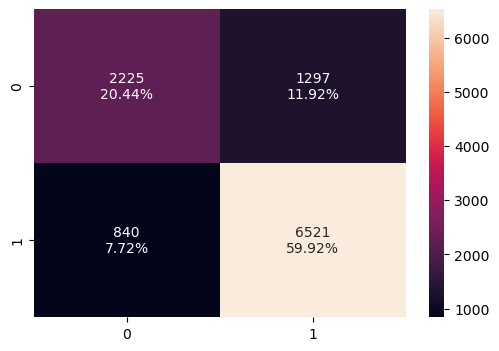

In [75]:
confusion_matrix_statsmodels(logit_2, x_test2, y_test)

In [76]:
log_reg_model_test_perf=model_performance_classification_statsmodels(logit_2, x_test2, y_test)
print("Training modelperformance")
log_reg_model_test_perf

Training modelperformance


Accuracy    Recall  Precision        F1
0  0.803639  0.885885   0.834101  0.859213

- The model is giving a good f1_score of ~0.860613 and ~0.859213 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

## Model Performance Improvement
Let's see if the f1_score can be improved further by changing the model threshold
First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC
#### ROC-AUC on training set

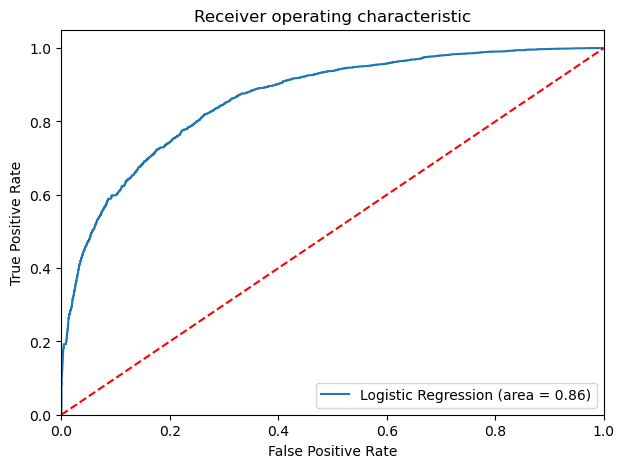

In [77]:
roc_score_train=roc_auc_score(y_train,logit_2.predict(x_train2))
fpr, tpr, thresholds=roc_curve(y_train,logit_2.predict(x_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % roc_score_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [78]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.6338133272047491


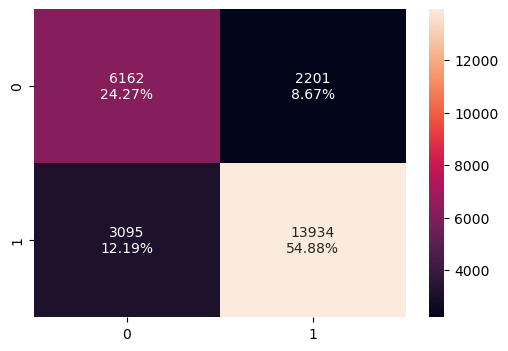

In [79]:
confusion_matrix_statsmodels(
    logit_2, x_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [80]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    logit_2, x_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_train_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0   0.79143  0.818251   0.863588  0.840309

### roc- curve Test-sample 

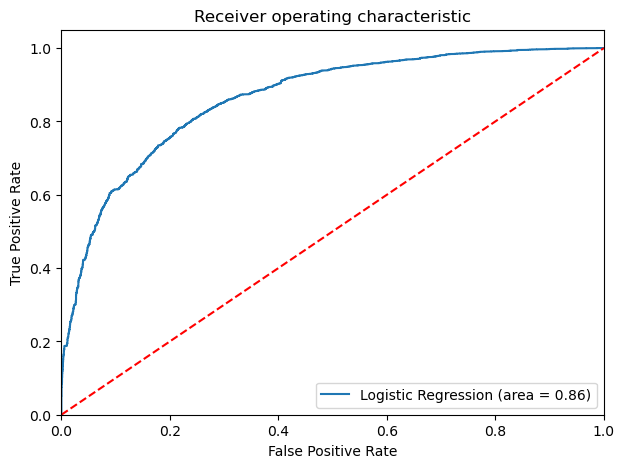

In [81]:
roc_score_test=roc_auc_score(y_test,logit_2.predict(x_test2))
fpr,tpr,threshold=roc_curve(y_test,logit_2.predict(x_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % roc_score_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

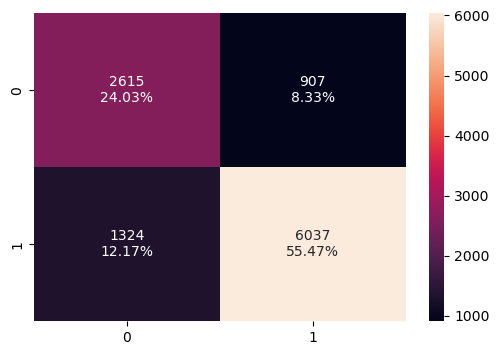

In [82]:
confusion_matrix_statsmodels(
    logit_2, x_test2, y_test, threshold=optimal_threshold_auc_roc
)

In [83]:
log_reg_model_test_perf_threshold_auc_roc=model_performance_classification_statsmodels(
    logit_2, x_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("testing modelperformance")
log_reg_model_test_perf_threshold_auc_roc

testing modelperformance


Accuracy    Recall  Precision        F1
0  0.795001  0.820133   0.869384  0.844041

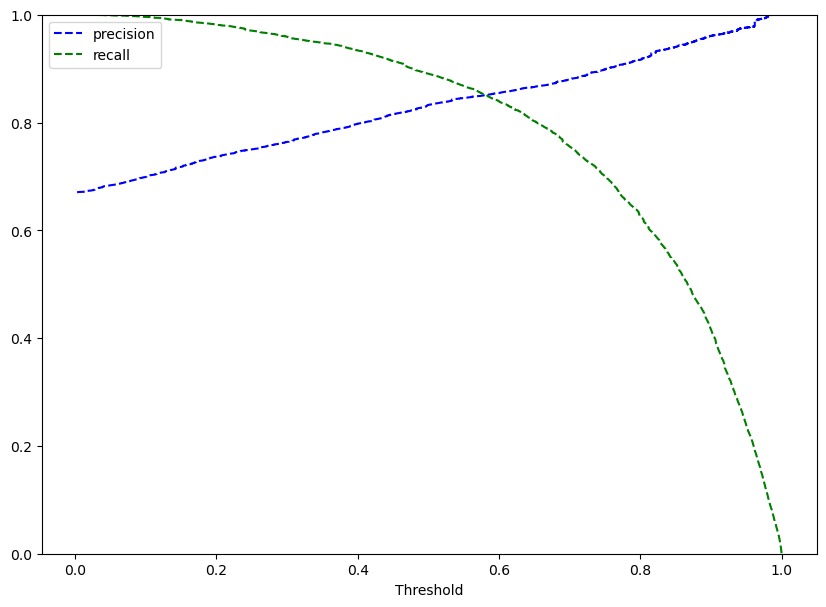

In [84]:
y_scores = logit_2.predict(x_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- The Threshold 0.59 we will get the balance threshold value

In [85]:
optimal_threshold_curve = 0.59

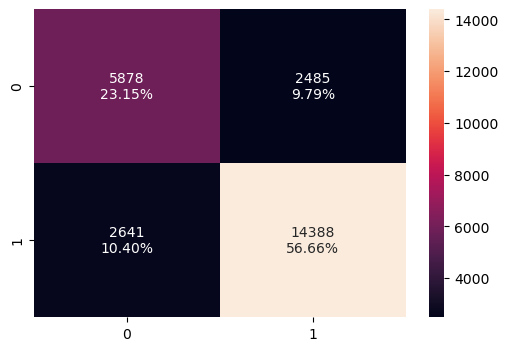

In [86]:
confusion_matrix_statsmodels(
    logit_2, x_train2, y_train, threshold=optimal_threshold_curve
)

In [87]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    logit_2, x_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.798125  0.844912   0.852723  0.848799

Model is performing well on training set.
There's not much improvement in the model performance as the default threshold is 0.63 and here we get 0.59 as the optimal threshold.

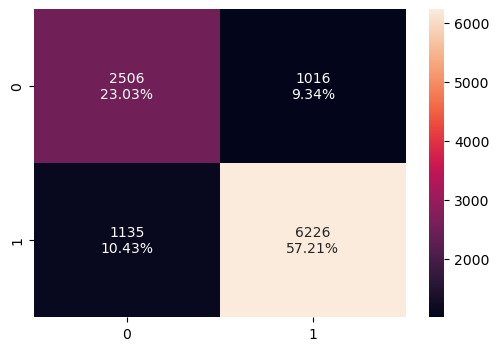

In [88]:
confusion_matrix_statsmodels(
    logit_2, x_test2, y_test, threshold=optimal_threshold_curve
)

In [89]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    logit_2, x_test2, y_test, threshold=optimal_threshold_curve
)
print("Testing performance:")
log_reg_model_test_perf_threshold_curve

Testing performance:


Accuracy    Recall  Precision        F1
0  0.802352  0.845809   0.859707  0.852701

## Model Performance Comparison and Final Model Selection

In [90]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.63 Threshold",
    "Logistic Regression-0.59 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.806553   
Recall                                        0.890481   
Precision                                     0.832684   
F1                                            0.860613   

           Logistic Regression-0.63 Threshold  \
Accuracy                             0.791430   
Recall                               0.818251   
Precision                            0.863588   
F1                                   0.840309   

           Logistic Regression-0.59 Threshold  
Accuracy                             0.798125  
Recall                               0.844912  
Precision                            0.852723  
F1                                   0.848799

In [91]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.63 Threshold",
    "Logistic Regression-0.59 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.803639   
Recall                                        0.885885   
Precision                                     0.834101   
F1                                            0.859213   

           Logistic Regression-0.63 Threshold  \
Accuracy                             0.795001   
Recall                               0.820133   
Precision                            0.869384   
F1                                   0.844041   

           Logistic Regression-0.59 Threshold  
Accuracy                             0.802352  
Recall                               0.845809  
Precision                            0.859707  
F1                                   0.852701

- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a default threshold (0.5) is giving the best F1 score. Therefore it can be selected as the final model

## Conclusions and Recommendations

- We have been able to build a predictive model that can be used INN Hotels to find the customers cancelled with an f1_score of 0.85 on the training set and formulate policies accordingly.

- All the logistic regression models have given a generalized performance on the training and test set.

- Coefficient of some levels of required_car_parking_space, repeated_guest,no_of_special_requests and market_segment_type_Offline are positive an increase in these will lead to increase in chances of a customer not-Cancel.

- required_car_parking_space: Holding all other features constant a 1 unit change in market_segment_type_Offline will increase the odds of a customer not-cancel by ~4.9 times or a ~390% increase in odds of not-cancelling.

- INN Hotels need to reduse the lead time that would reduce the chance of the cancelation. People book earlies has highest chance of cancelation.

- As the Number of the gust and the childern increase there is high possible chance of cancelation.


## Building a Decision Tree model

***For the decision Tree model the outliers will not effect the results so we have to build the X and Y and the train and the test***

In [92]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [93]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [94]:
data=data.replace({"booking_status":{"Not_Canceled":1,"Canceled":0}})
X=data.drop("booking_status",axis=1)
Y=data["booking_status"]
X=pd.get_dummies(X,columns=["type_of_meal_plan","room_type_reserved","market_segment_type"],dtype=float)
X["lead_time"]=X["lead_time"]/365
X["arrival_year"]=X["arrival_year"]/2018
X["arrival_month"]=X["arrival_month"]/12
X["arrival_date"]=X["arrival_date"]/30
X

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                               0   0.613699      0.999504       0.833333   
1                               0   0.013699      1.000000       0.916667   
2                               0   0.002740      1.000000       0.166667   
3                               0   0.578082      1.000000       0.416667   
4                               0   0.131507      1.000000       0.333333   
...                           ...        ...           ...            ...   
36270                           0   0.232877      1.000000       0.666667   
36271                           0   0.624658      1.000000       0.833333   
36272                           0   0.405479      1.000000       0.583333   
36273                           0   0.172603      1.000000       0.333333   
36274                           0   0.567123      1.000000       1.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
0          0.066667               0                             0   
1          0.200000               0                             0   
2          0.933333               0                             0   
3          0.666667               0                             0   
4          0.366667               0                             0   
...             ...             ...                           ...   
36270      0.100000               0                             0   
36271      0.566667               0                             0   
36272      0.033333               0                             0   
36273      0.700000               0                             0   
36274      1.000000               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               94.50   
...                                     ...                 ...   
36270                                     0              167.80   
36271                                     0               90.95   
36272                                     0               98.39   
36273                                     0               94.50   
36274                                     0              161.67   

       no_of_special_requests  type_of_meal_plan_Meal Plan 1  \
0                           0                            1.0   
1                           1                            0.0   
2                           0                            1.0   
3                           0                            1.0   
4                           0                            0.0   
...                       ...                            ...   
36270                       1          

In [95]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X,Y,random_state=1,test_size=.30)

In [96]:
model0=DecisionTreeClassifier(random_state=1)
model0.fit(X_train_1,y_train_1)

DecisionTreeClassifier(random_state=1)

### Model Evaluation
#### Model evaluation criterion

***Model can make wrong predictions as:***

- Predicting a customer will not cancel but in reality, the customer will cancel (FN)
- Predicting a customer will cancel but in reality, the customer will not cancel (FP)

***Which case is more important?***

- If we predict that a customer will not cancel but in reality, the customer cancel, then the company will have to bear the cost loss of booking.

- If we predict that a customer will cancel but in reality, the customer does not cancel, then the company will have to accomidated the room for the customer.

- Booking by the customer and canceled that would cost more for the company

How to reduce the losses?

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

### DecisionTree for train data 

In [97]:
decision_tree_perf_train_without=model_performance_classification_sklearn(model0,X_train_1,y_train_1)
decision_tree_perf_train_without

Accuracy    Recall  Precision        F1
0  0.994211  0.995772   0.995597  0.995684

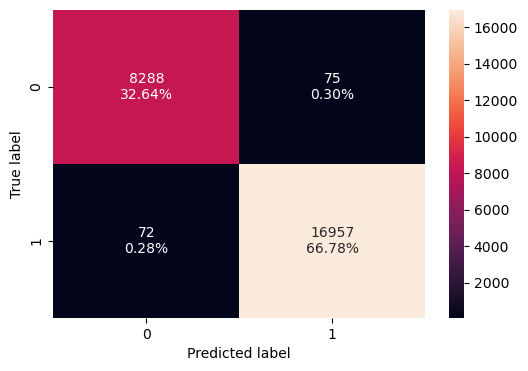

In [98]:
confusion_matrix_sklearn(model0,X_train_1,y_train)

### DecisionTree for Test data 

In [99]:
decision_tree_perf_test_without=model_performance_classification_sklearn(model0,X_test_1,y_test_1)
decision_tree_perf_test_without

Accuracy    Recall  Precision        F1
0  0.868786  0.897568    0.90743  0.902472

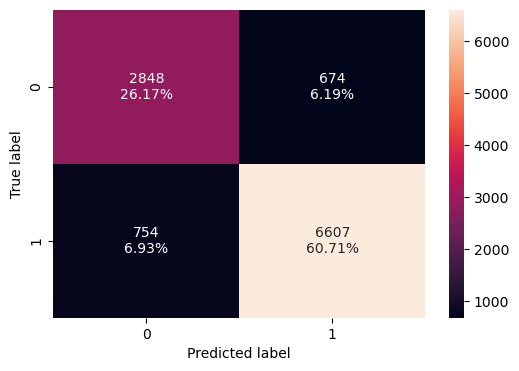

In [100]:
confusion_matrix_sklearn(model0,X_test_1,y_test_1)

- Test and the train data results having with high difference with ~0.10 

In [101]:
feature_name=X_train_1.columns.to_list()

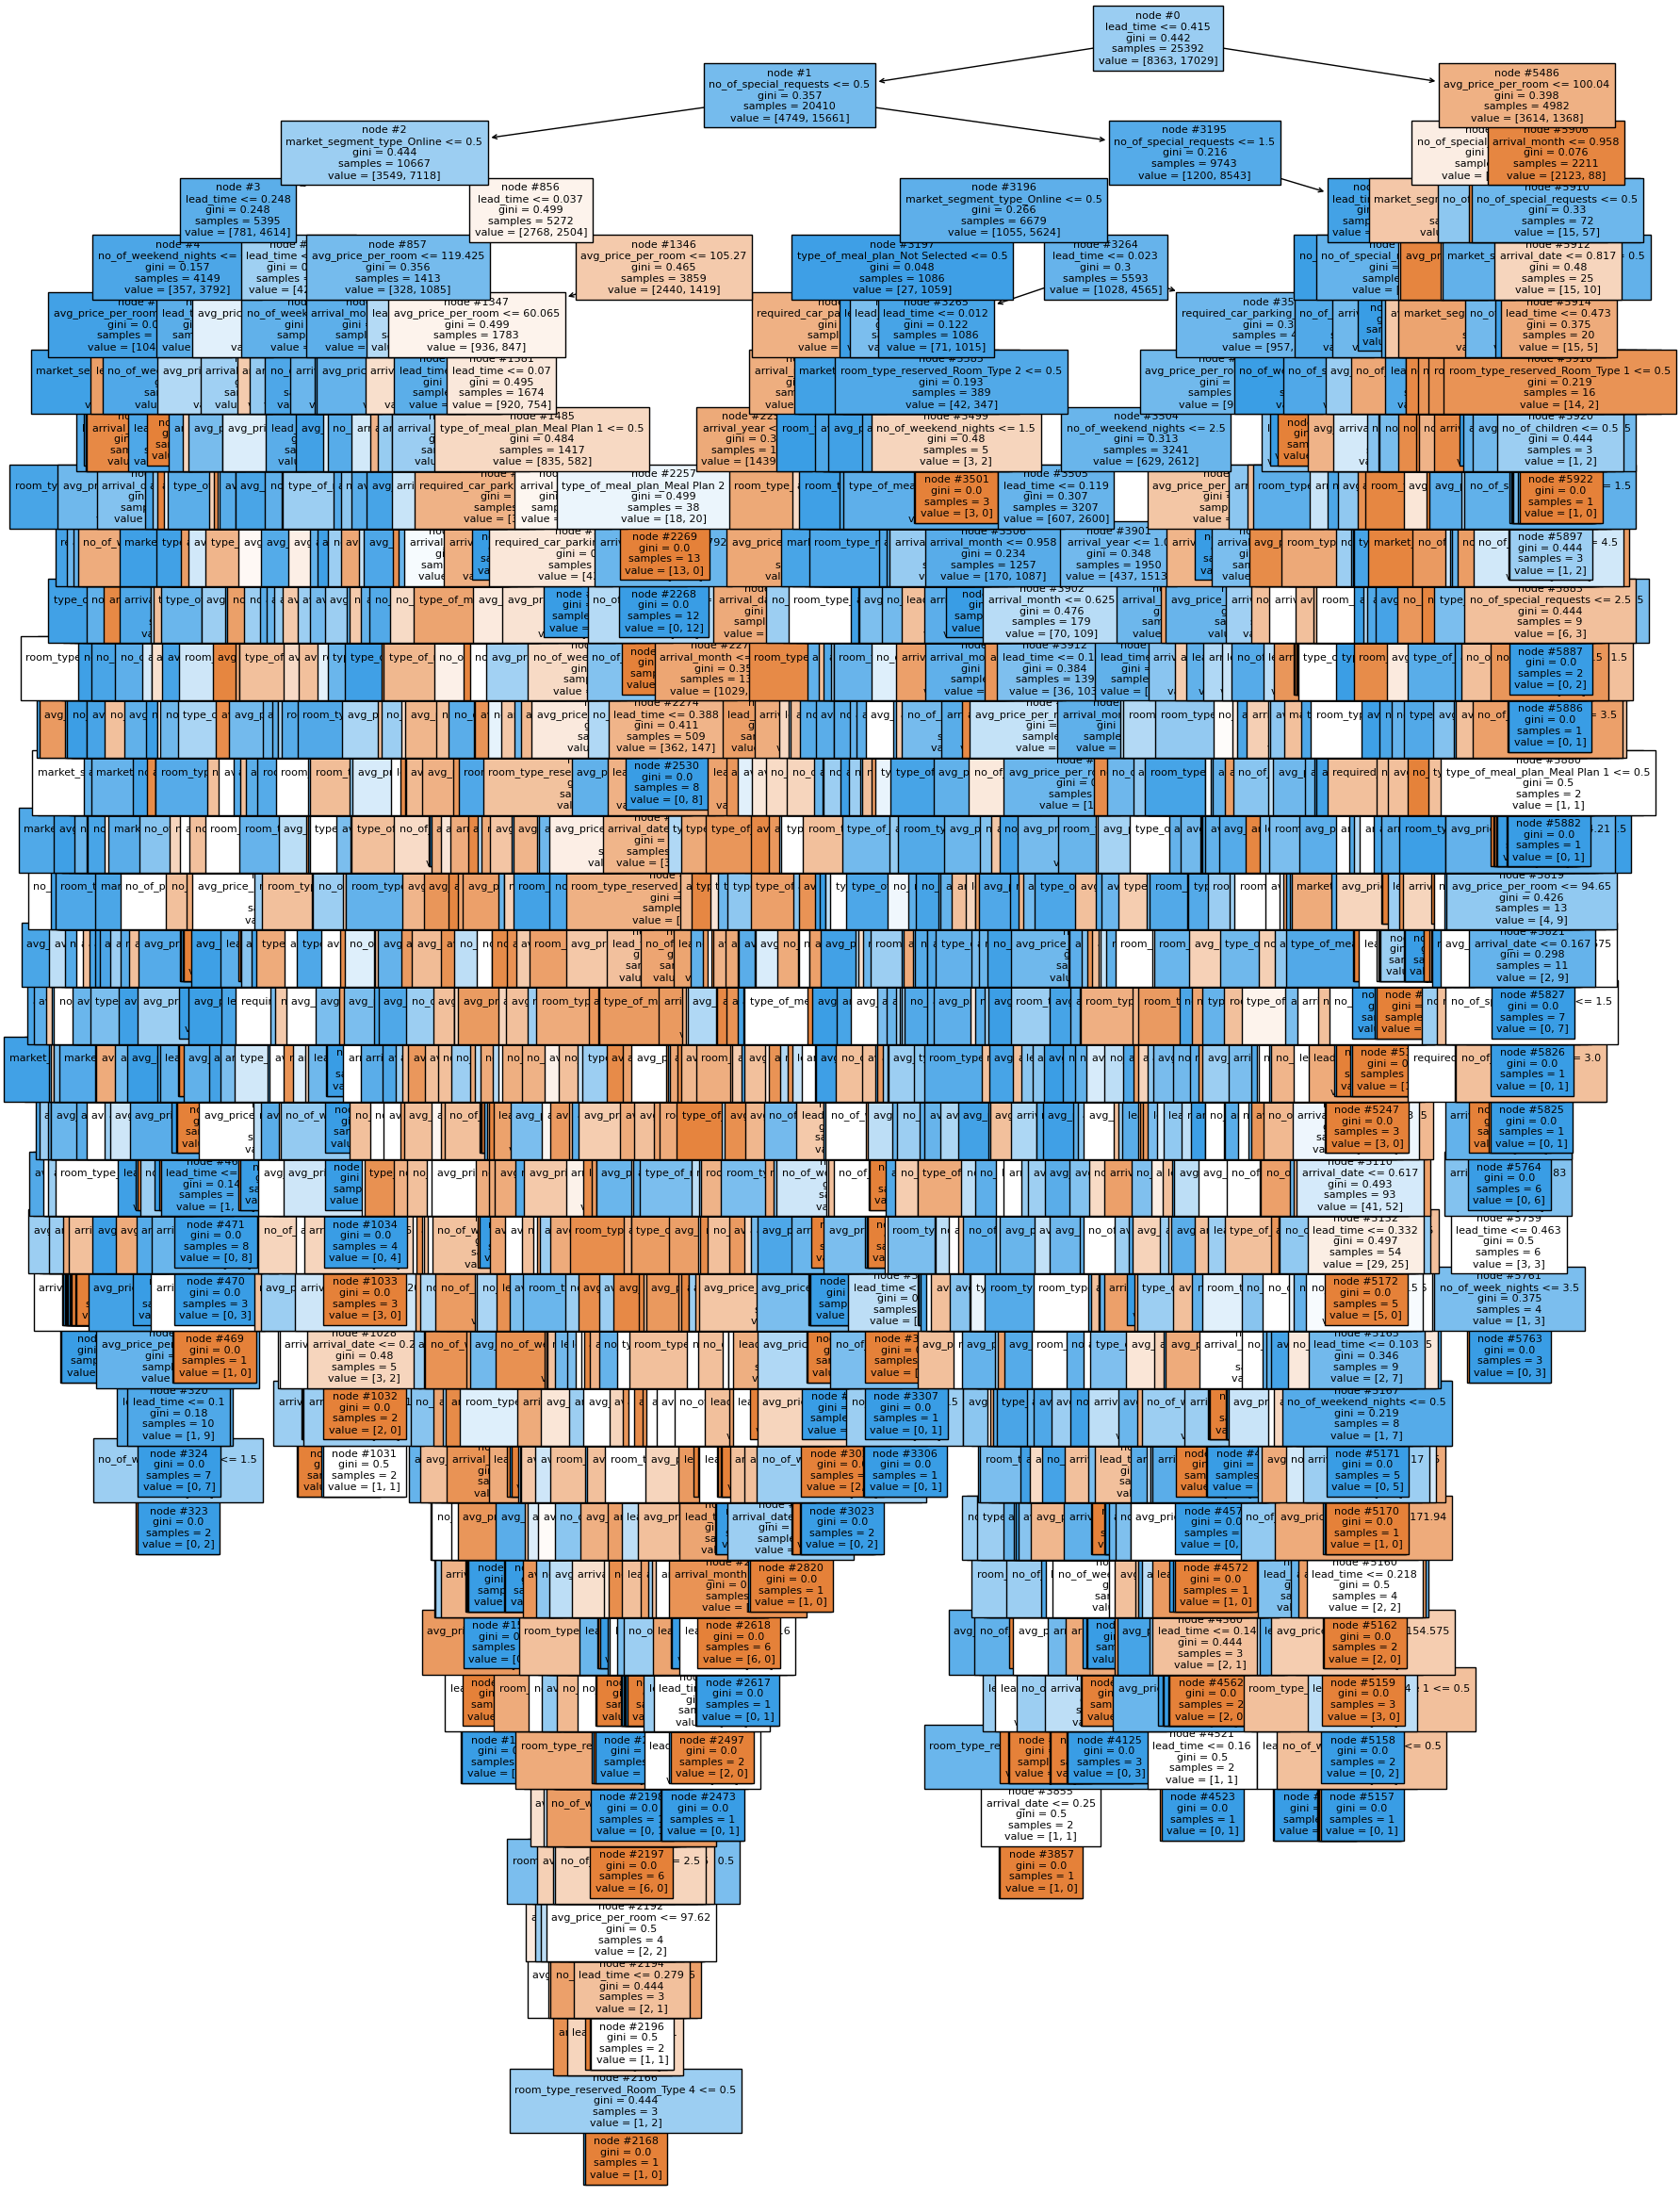

In [102]:
plt.figure(figsize=(20,30))
out=tree.plot_tree(model0, 
    feature_names=feature_name,
    class_names=None,
    filled=True,
    impurity=True,
    node_ids=True,
    proportion=False,
    rounded=False,
    precision=3,
    fontsize=8);

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [103]:
print(tree.export_text(model0,feature_names=feature_name,show_weights=True))

|--- lead_time <= 0.42
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 0.25
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 0.05
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 147.00] class: 1
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 >  

In [104]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model0.feature_importances_, columns = ["Imp"], index = X_train_1.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.355141
avg_price_per_room                    0.167825
market_segment_type_Online            0.093992
arrival_date                          0.081904
no_of_special_requests                0.067521
arrival_month                         0.064507
no_of_week_nights                     0.047596
no_of_weekend_nights                  0.041378
no_of_adults                          0.026909
arrival_year                          0.011179
required_car_parking_space            0.006792
type_of_meal_plan_Meal Plan 1         0.006485
room_type_reserved_Room_Type 4        0.005167
no_of_children                        0.004766
room_type_reserved_Room_Type 1        0.004467
type_of_meal_plan_Not Selected        0.004081
type_of_meal_plan_Meal Plan 2         0.003275
market_segment_type_Offline           0.002005
room_type_reserved_Room_Type 2        0.001672
room_type_reserved_Room_Type 5        0.000755
repeated_gues

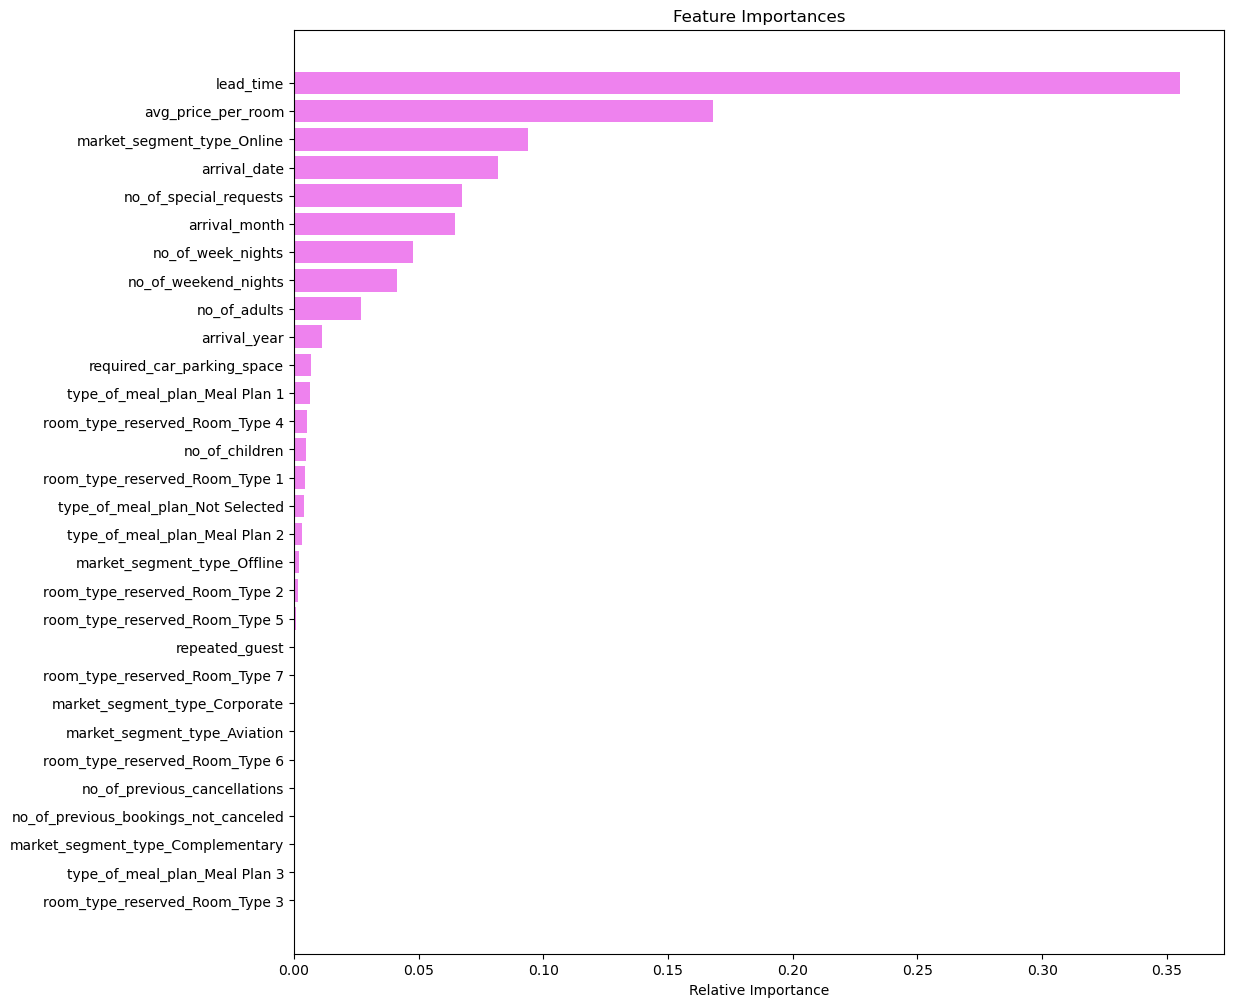

In [105]:
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Decision Tree (with class_weights)

***Train data-set***

In [106]:
model1=DecisionTreeClassifier(random_state=1,class_weight="balanced")
model1.fit(X_train_1,y_train_1)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [107]:
decision_tree_perf_train_with_weigth= model_performance_classification_sklearn(model1,X_train_1,y_train_1)
decision_tree_perf_train_with_weigth

Accuracy    Recall  Precision        F1
0  0.993108  0.992131   0.997579  0.994848

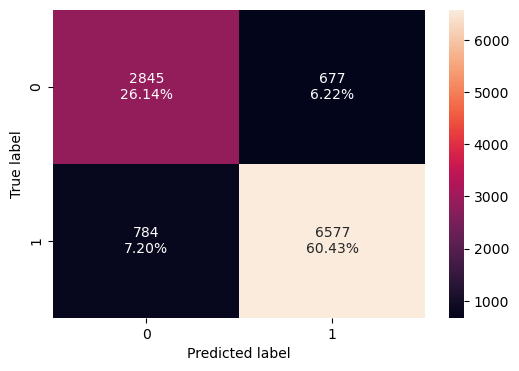

In [108]:
confusion_matrix_sklearn(model1,X_test_1,y_test_1)

***Test dataset with weigth***

In [109]:
decision_tree_perf_test_with_weigth= model_performance_classification_sklearn(model1,X_test_1,y_test_1)
decision_tree_perf_test_with_weigth

Accuracy    Recall  Precision        F1
0  0.865754  0.893493   0.906672  0.900034

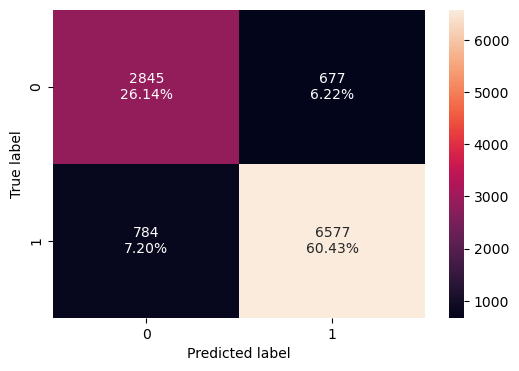

In [110]:
confusion_matrix_sklearn(model1,X_test_1,y_test_1)

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

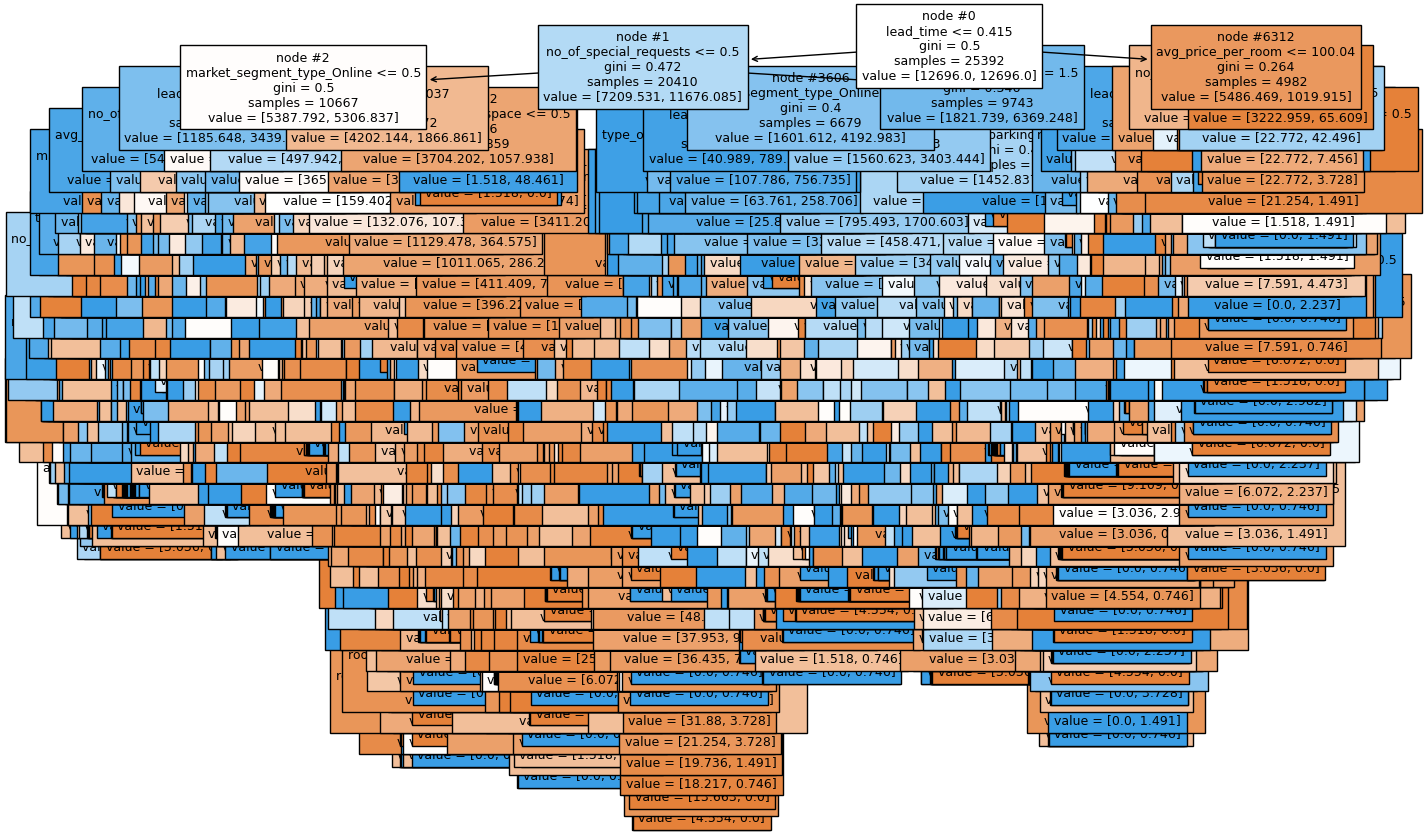

In [111]:
plt.figure(figsize=(15,10))

tree.plot_tree(model1,feature_names=feature_name,filled=True,fontsize=9,node_ids=True)
plt.show()

In [112]:
print(tree.export_text(model1,feature_names=feature_name,show_weights=True))

|--- lead_time <= 0.42
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 0.25
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 0.05
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 48.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 46.97] class: 1
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  48.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 81.27] class: 1
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  6

In [113]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model1.feature_importances_, columns = ["Imp"], index = X_train_1.columns).sort_values(by = 'Imp', ascending = False))

                                               Imp
lead_time                             3.556624e-01
avg_price_per_room                    1.435589e-01
market_segment_type_Online            9.585773e-02
no_of_special_requests                8.654885e-02
arrival_date                          8.007976e-02
arrival_month                         6.425571e-02
no_of_week_nights                     4.617854e-02
no_of_weekend_nights                  3.456188e-02
no_of_adults                          2.706616e-02
arrival_year                          1.661219e-02
market_segment_type_Offline           9.163721e-03
required_car_parking_space            7.895821e-03
type_of_meal_plan_Meal Plan 1         5.854283e-03
type_of_meal_plan_Not Selected        5.016972e-03
no_of_children                        4.272987e-03
room_type_reserved_Room_Type 4        3.676680e-03
room_type_reserved_Room_Type 1        3.492793e-03
room_type_reserved_Room_Type 2        2.971999e-03
type_of_meal_plan_Meal Plan 2  

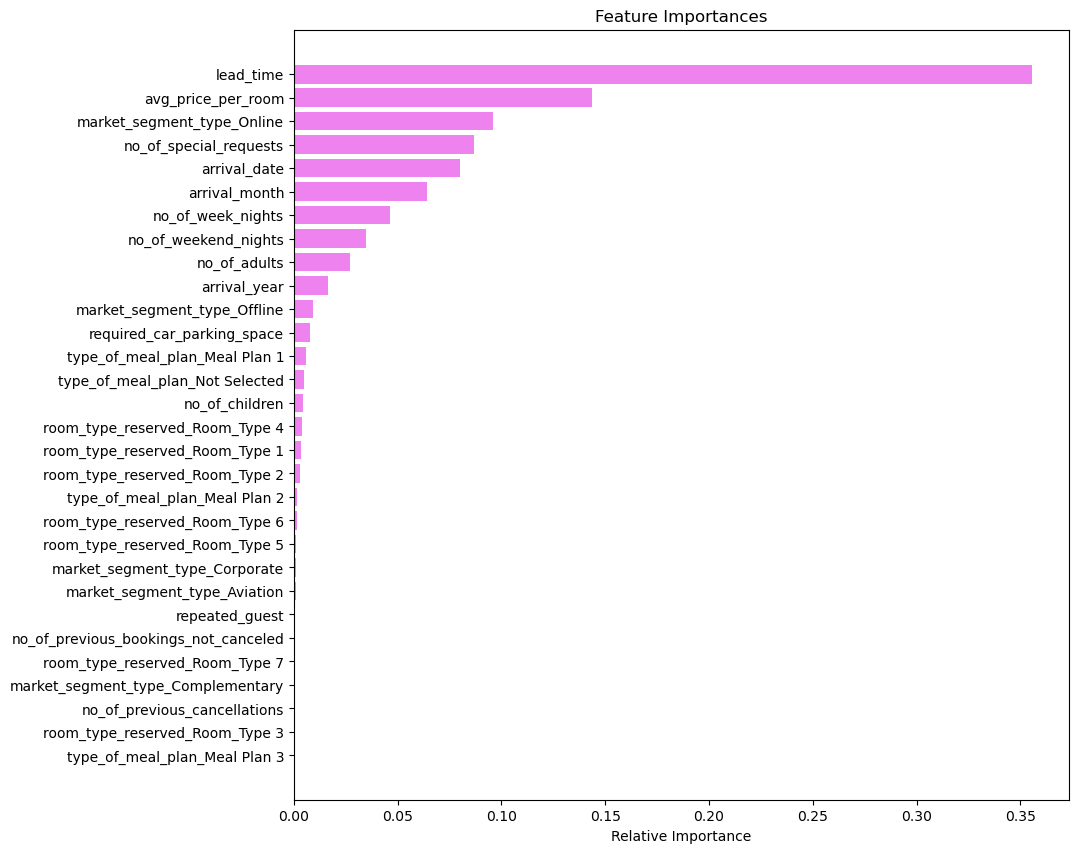

In [114]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Let's use pruning techniques to try and reduce overfitting.**
## Do we need to prune the tree?

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [115]:
from sklearn.metrics import make_scorer
estimator=DecisionTreeClassifier(random_state=1)
parameter={
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
scoring_parameter=make_scorer(recall_score)
gridObj=GridSearchCV(estimator,parameter,scoring=scoring_parameter,cv=5)
gridObj.fit(X_train_1,y_train_1)
estimator=gridObj.best_estimator_
estimator.fit(X_train_1,y_train_1)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

In [116]:
decision_tree_perf_train_estimator= model_performance_classification_sklearn(estimator,X_train_1,y_train_1)
decision_tree_perf_train_estimator

Accuracy    Recall  Precision        F1
0  0.759097  0.919666    0.76732  0.836614

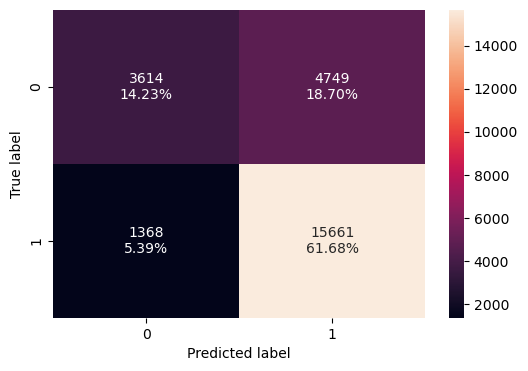

In [117]:
confusion_matrix_sklearn(estimator,X_train_1,y_train_1)

***GVsearch for testdata***

In [118]:
decision_tree_perf_test_estimator= model_performance_classification_sklearn(estimator,X_test_1,y_test_1)
decision_tree_perf_test_estimator

Accuracy    Recall  Precision        F1
0  0.763117  0.916995   0.774349  0.839657

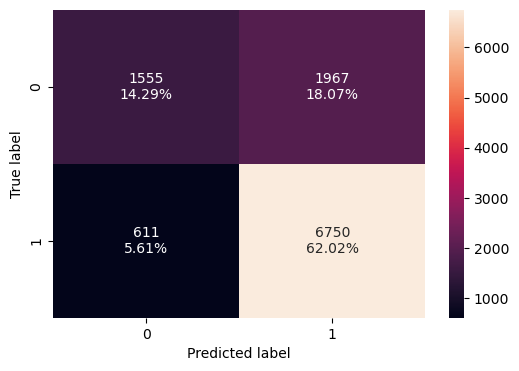

In [119]:
confusion_matrix_sklearn(estimator,X_test_1,y_test_1)

* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.91 which shows that the model is able to generalize well on unseen data.

### Building the decision tree split

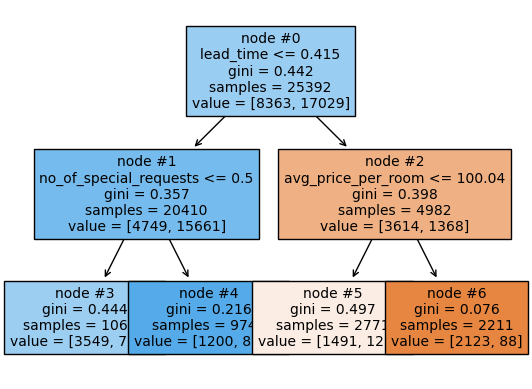

In [120]:
feature_name=X_train_1.columns.to_list()
feature_important=estimator.feature_importances_
tree.plot_tree(estimator,filled=True,feature_names=feature_name,impurity=True,node_ids=True,fontsize=10);

### export_text for Descisiontree

In [121]:
print(tree.export_text(estimator,feature_names=feature_name,show_weights=True))

|--- lead_time <= 0.42
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [3549.00, 7118.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [1200.00, 8543.00] class: 1
|--- lead_time >  0.42
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [1491.00, 1280.00] class: 0
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [2123.00, 88.00] class: 0



### BAR-GRAPH for the important feature

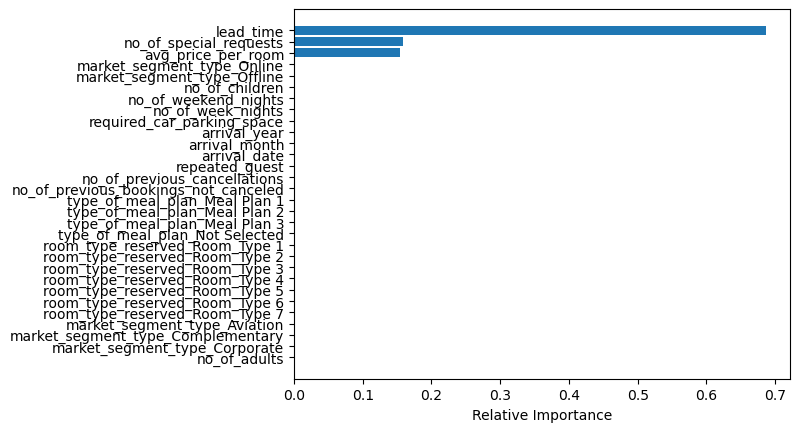

In [122]:
index_sort=np.argsort(feature_important)
plt.barh(range(len(index_sort)),feature_important[index_sort]);
plt.yticks(range(len(index_sort)),[feature_name[i] for i in index_sort]);
plt.xlabel("Relative Importance")
plt.show()

### Observations from the pre-pruned tree:

- Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the lead Time is less than or equal to .42 (less than half year), the no_of_special_request is less than or equal to .50,the customer mostly likly not cancel 

* If the lead Time is greater than .42 (more than half year), the avg_price_per_room is less than or equal to 100.04,the customer mostly likly cancel

### Decision Tree (Post pruning)
The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [123]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train_1, y_train_1)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [124]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008376
1     0.000000e+00    0.008376
2     2.933821e-20    0.008376
3     2.933821e-20    0.008376
4     2.933821e-20    0.008376
...            ...         ...
1863  8.901596e-03    0.328058
1864  9.802243e-03    0.337860
1865  1.271875e-02    0.350579
1866  3.412090e-02    0.418821
1867  8.117914e-02    0.500000

[1868 rows x 2 columns]

Graph for the ccp_alphas vs impurities

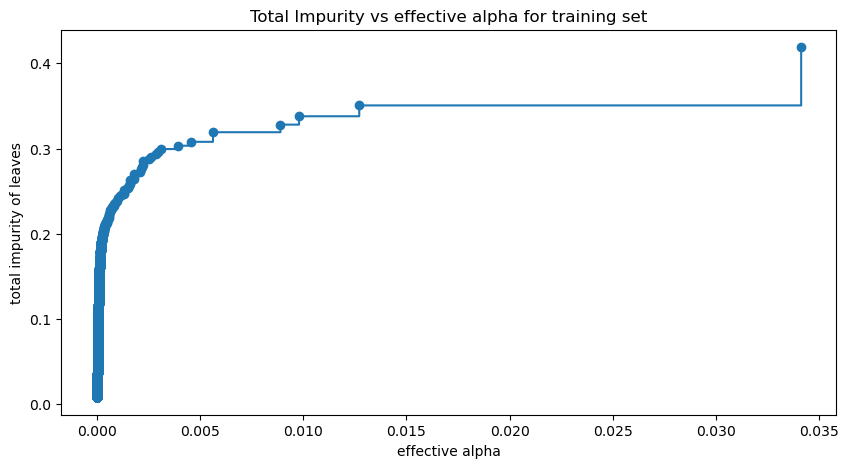

In [125]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [126]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train_1, y_train_1)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137176


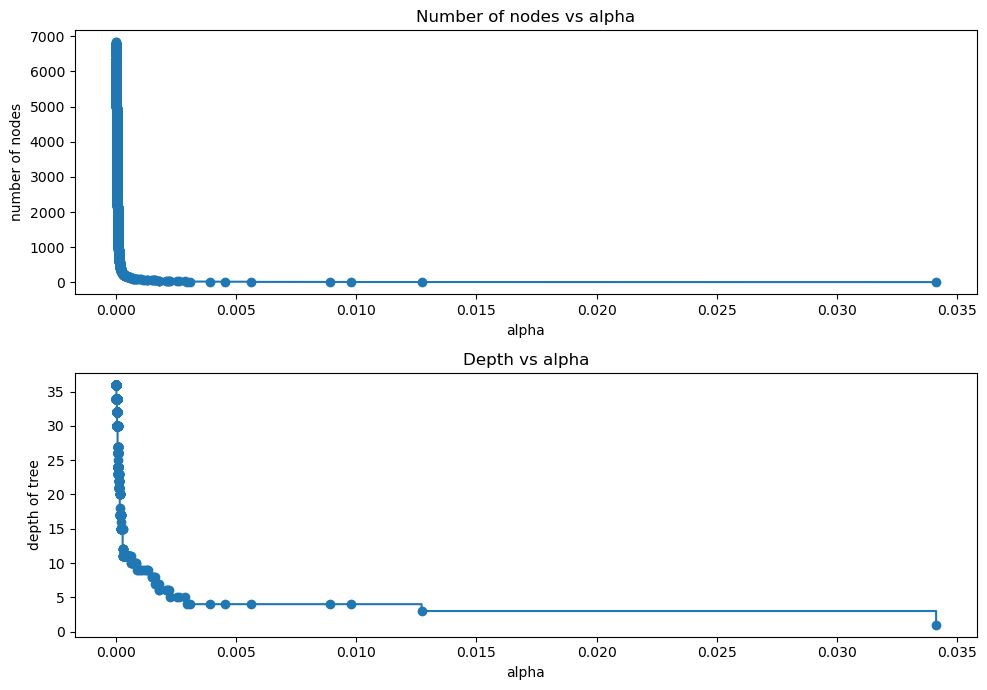

In [127]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [128]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train_1)
    values_train = recall_score(y_train_1, pred_train)
    recall_train.append(values_train)

In [129]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test_1)
    values_test = recall_score(y_test_1, pred_test)
    recall_test.append(values_test)

In [130]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test_1)
    values_test = recall_score(y_test_1, pred_test)
    recall_test.append(values_test)  

In [131]:
train_scores = [clf.score(X_train_1, y_train_1) for clf in clfs]
test_scores = [clf.score(X_test_1, y_test_1) for clf in clfs]

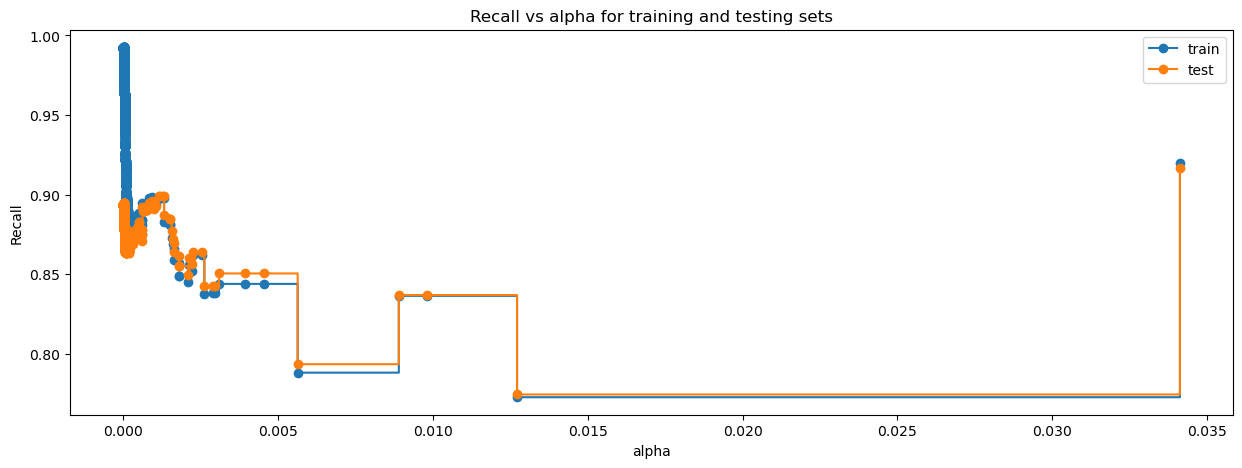

In [132]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [133]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.034120904381341494, class_weight='balanced',
                       random_state=1)


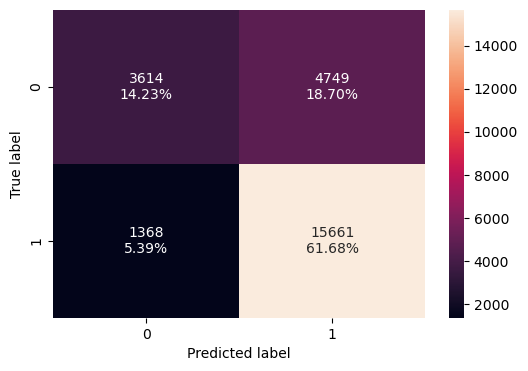

In [134]:
confusion_matrix_sklearn(best_model,X_train_1,y_train_1)

In [135]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train_1, y_train_1
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.759097  0.919666    0.76732  0.836614

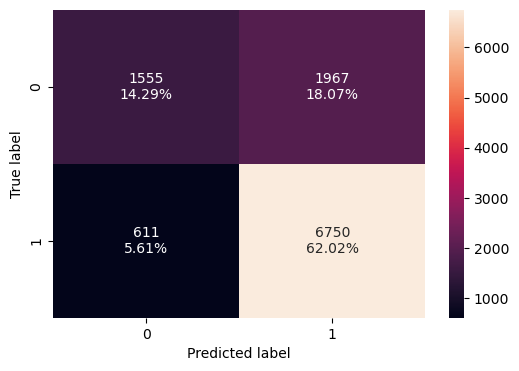

In [136]:
confusion_matrix_sklearn(best_model,X_test_1,y_test_1)

In [137]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test_1, y_test_1
)
decision_tree_post_test

Accuracy    Recall  Precision        F1
0  0.763117  0.916995   0.774349  0.839657

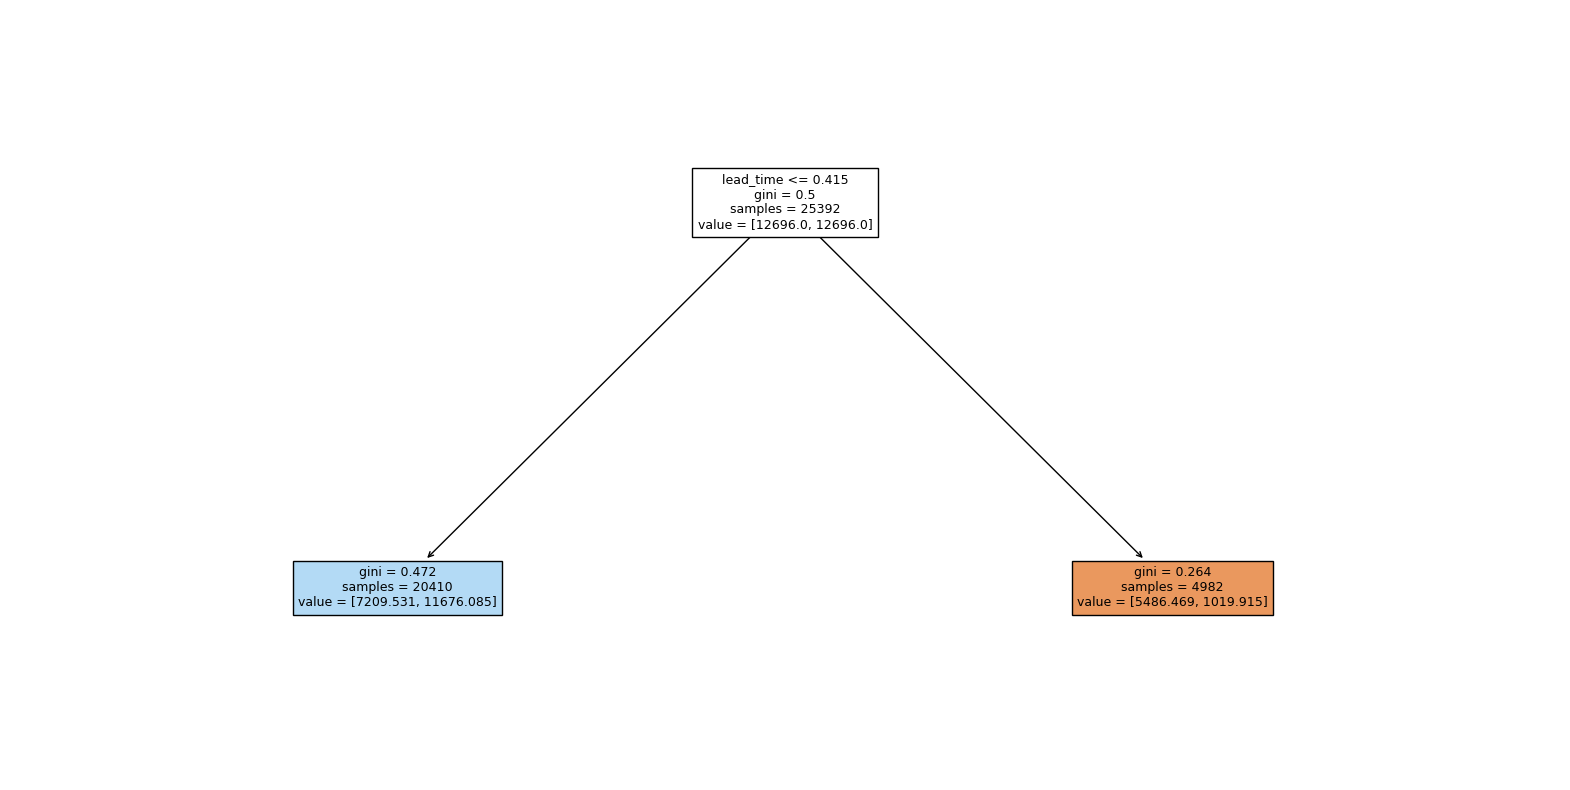

In [138]:

plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_name,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [139]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train_1.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                      Imp
lead_time                             1.0
no_of_adults                          0.0
type_of_meal_plan_Meal Plan 3         0.0
market_segment_type_Offline           0.0
market_segment_type_Corporate         0.0
market_segment_type_Complementary     0.0
market_segment_type_Aviation          0.0
room_type_reserved_Room_Type 7        0.0
room_type_reserved_Room_Type 6        0.0
room_type_reserved_Room_Type 5        0.0
room_type_reserved_Room_Type 4        0.0
room_type_reserved_Room_Type 3        0.0
room_type_reserved_Room_Type 2        0.0
room_type_reserved_Room_Type 1        0.0
type_of_meal_plan_Not Selected        0.0
type_of_meal_plan_Meal Plan 2         0.0
no_of_children                        0.0
type_of_meal_plan_Meal Plan 1         0.0
no_of_special_requests                0.0
avg_price_per_room                    0.0
no_of_previous_bookings_not_canceled  0.0
no_of_previous_cancellations          0.0
repeated_guest                    

In [140]:

print(tree.export_text(best_model, feature_names=feature_name, show_weights=True))

|--- lead_time <= 0.42
|   |--- weights: [7209.53, 11676.09] class: 1
|--- lead_time >  0.42
|   |--- weights: [5486.47, 1019.91] class: 0



- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

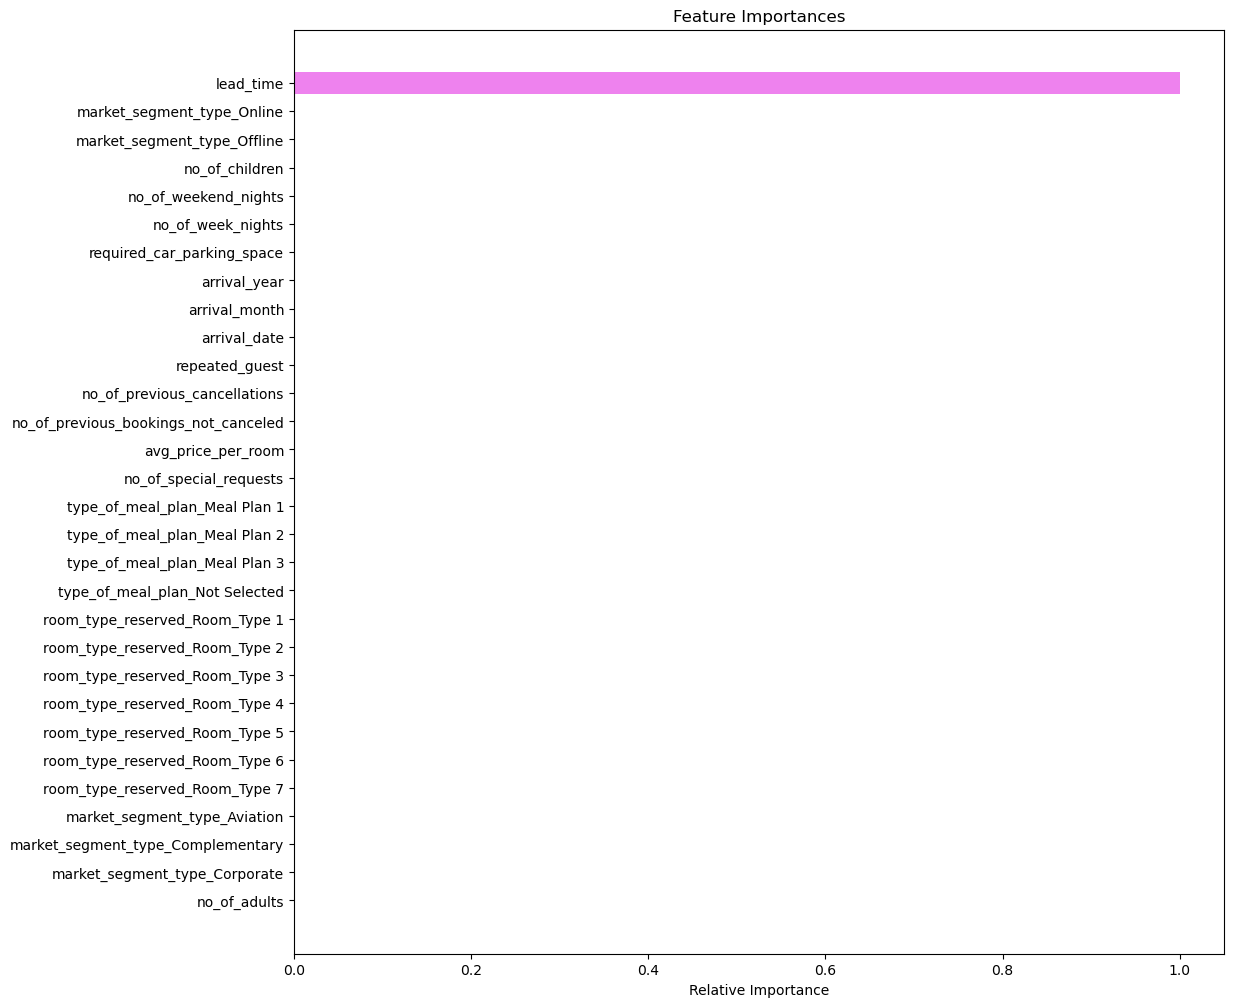

In [141]:
importances = best_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [142]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train_with_weigth.T,
        decision_tree_perf_train_estimator.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                             0.994211   
Recall                               0.995772   
Precision                            0.995597   
F1                                   0.995684   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                          0.993108                     0.759097   
Recall                            0.992131                     0.919666   
Precision                         0.997579                     0.767320   
F1                                0.994848                     0.836614   

           Decision Tree (Post-Pruning)  
Accuracy                       0.759097  
Recall                         0.919666  
Precision                      0.767320  
F1                             0.836614

In [143]:
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test_with_weigth.T,
        decision_tree_perf_test_estimator.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  \
Accuracy                             0.868786   
Recall                               0.897568   
Precision                            0.907430   
F1                                   0.902472   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                          0.865754                     0.763117   
Recall                            0.893493                     0.916995   
Precision                         0.906672                     0.774349   
F1                                0.900034                     0.839657   

           Decision Tree (Post-Pruning)  
Accuracy                       0.763117  
Recall                         0.916995  
Precision                      0.774349  
F1                             0.839657

- Decision tree models with pre-pruning and post-pruning both are giving equally high recall scores on both training and test sets.
- However, we will choose the post pruned tree as the best model since it is giving a slightly high precision score on the train and test sets than the pre-pruned tree.

## Actionable Insights and Recommendations


- ***What profitable policies for cancellations and refunds can the hotel adopt?***

- Hotel need to adopt the the 24 hrs cancelation when the customer book lead time greater than 6 month. The Hotel need to have the notes for the specical requests that are requested in the past and start adopting them. this will also decrease the chance of cancelation. The 0 dollar offers need to to stop and start haveing the promotional discount that will increase the Hotel income. 

- The hotel need to show the user only 8months or 1 year of booking details if it more there is more chance of cancelation 

- Need to reduce more complimentary room and increase more on the corporate room 
- The cancelation policies should be different for the sigments, that will help the Hotel for less cancelation 

- ***What other recommedations would you suggest to the hotel?***
- Hotel need to provide more data on the type of the room, Because there are some type_of_room which were booked less, That could be the premium room or that budgut friendly room so that that will help data scients to give more insight on which rooms these offers need to increase or decrease.


In [144]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25392 entries, 13662 to 33003
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 25392 non-null  float64
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_children                        25392 non-null  int64  
 3   no_of_weekend_nights                  25392 non-null  int64  
 4   no_of_week_nights                     25392 non-null  int64  
 5   type_of_meal_plan                     25392 non-null  int64  
 6   required_car_parking_space            25392 non-null  int64  
 7   lead_time                             25392 non-null  float64
 8   arrival_year                          25392 non-null  int64  
 9   arrival_month                         25392 non-null  float64
 10  arrival_date                          25392 non-null  float64
 11  repeated_guest  

In [145]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn import metrics
from xgboost import XGBClassifier
model = []
results=[]
score=[]
names=[]
model.append(("RandomForest",RandomForestClassifier(random_state=1,class_weight="balanced")))
model.append(("AdaBoost",AdaBoostClassifier(random_state=1)))
model.append(("GradiendBoost",GradientBoostingClassifier(random_state=1)))
model.append(("Xgboost",XGBClassifier()))
for name, models in  (model):
    kfold=StratifiedKFold(random_state=1,shuffle=True)
    ssc_score=metrics.make_scorer(metrics.accuracy_score)
    cross_score=cross_val_score(estimator=models,X=x_train,y=y_train,cv=kfold,scoring=ssc_score)
    score.append(cross_score)
    names.append(name)
    print("{},{}".format(cross_score.mean(),names))

0.8964240230820154,['RandomForest']
0.8188801652286933,['RandomForest', 'AdaBoost']
0.8485350679430418,['RandomForest', 'AdaBoost', 'GradiendBoost']
0.8878782041693196,['RandomForest', 'AdaBoost', 'GradiendBoost', 'Xgboost']


In [146]:
%%time 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=x_train, y=y_train, scoring = ssc_score,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(x_train, y_train)
    scores = metrics.accuracy_score(y_test, model.predict(x_test))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.8825612277570123
Random forest: 0.89717226389412
GBM: 0.8485350679430418
Adaboost: 0.8188801652286933
Xgboost: 0.8878782041693196
dtree: 0.8563718765366215

Validation Performance:

Bagging: 0.8894606266654416
Random forest: 0.9040705687769917
GBM: 0.8525222824588808
Adaboost: 0.8193512818156758
Xgboost: 0.8933198566571717
dtree: 0.8693374988514196
CPU times: user 26.1 s, sys: 3.68 s, total: 29.7 s
Wall time: 21.8 s


In [147]:
# we got the xgboost the best score 


#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling GridSearchCV
grid_cv_xgb = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv_xgb.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 1, 3, 5],
                         'learning_rate': [0.01, 0.1, 0.2, 0.05],
                         'max_depth': array([1, 2, 3, 4]),
                         'n_estimators': array([ 50, 100]),
                         'reg_lambda': [5, 10], 'scale_pos_weight': [2, 5, 10],
                         'subsample': [0.8, 0.9, 1]},
             scoring=make_scorer(accuracy_score))

In [148]:
print("Best parameters are {} with CV score={}:" .format(grid_cv_xgb.best_params_,grid_cv_xgb.best_score_))

Best parameters are {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 5, 'scale_pos_weight': 2, 'subsample': 0.8} with CV score=0.8610193988157648:


In [149]:
xgboost_grid_tuned=XGBClassifier(
    gamma=0,
    learning_rate=0.2,
    max_depth=4,
    n_estimators=100,
    reg_lambda=5,
    scale_pos_weight=2,
    subsample=0.8
    
)
xgboost_grid_tuned.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [151]:
x_train

const  no_of_adults  no_of_children  no_of_weekend_nights  \
13662    1.0             1               0                     0   
26641    1.0             2               0                     0   
17835    1.0             2               0                     2   
21485    1.0             2               0                     0   
5670     1.0             2               0                     1   
...      ...           ...             ...                   ...   
7813     1.0             2               0                     2   
32511    1.0             2               0                     0   
5192     1.0             1               0                     1   
12172    1.0             2               2                     1   
33003    1.0             2               0                     0   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
13662                  1                  3                           0   
26641                  3                  3                           0   
17835                  3                  3                           0   
21485                  3                  0                           0   
5670                   2                  3                           0   
...                  ...                ...                         ...   
7813                   1                  3                           0   
32511                  2                  3                           0   
5192                   2                  3                           0   
12172                  1                  3                           0   
33003                  3                  3                           0   

       lead_time  arrival_year  arrival_month  arrival_date  repeated_guest  \
13662   0.446575             1       0.833333      0.500000               0   
26641   0.309589             1       0.250000      1.033333               0   
17835   0.983562             1       0.833333      0.466667               0   
21485   0.372603             1       0.500000      0.966667               0   
5670    0.057534             1       0.666667      0.500000               0   
...          ...           ...            ...           ...             ...   
7813    0.180822             1       0.916667      0.400000               0   
32511   0.191781             1       0.333333      0.733333               0   
5192    0.065753             1       0.500000      0.200000               0   
12172   0.008219             1       0.250000      0.700000               0   
33003   0.608219             1       0.666667      1.033333               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
13662                             0                                     0   
26641                             0                                     0   
17835                             0                                     0   
21485                             0                                     0   
5670                              0                                     0   
...                             ...                                   ...   
7813                              0                                     0   
32511                             0                                     0   
5192                              0                                     0   
12172                             0                                     0   
33003                             0                                     0   

       avg_price_per_room  no_of_special_requests  \
13662              115.00                       0   
26641               78.15                       1   
17835               78.00                       1   
21485               85.50                       0   
5670               151.00                       0   
...                   ...                     ...   
7813               105.33                   

In [152]:
y_pre=accuracy_score(y_train,xgboost_grid_tuned.predict(x_train))
y_pre

0.8656269691241336

In [153]:
numerical_features=data.select_dtypes(exclude=np.object_).columns
numerical_features=numerical_features[:-1]
numerical_features

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [154]:
categorical_features=data.select_dtypes(include=np.object_).columns
categorical_features

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object')

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [156]:
# creating a list of numerical variables


# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features=data.select_dtypes(include=np.object_).columns

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


In [157]:
X = data.drop(columns="booking_status",axis=1)
Y = data["booking_status"]
# Splitting the data into train and test sets


In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBM",
           xgboost_grid_tuned,
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

(29020, 17) (7255, 17)


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous...
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [159]:

 import joblib
    
filename = "Completed_model.joblib"
joblib.dump(model, filename)

['Completed_model.joblib']

In [160]:
joblib.load(Completed_model.joblib)

NameError: name 'Completed_model' is not defined